In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import sys
sys.path.append("../mpi_scripts/")

import os
plt.style.use('../../styles/general.mplstyle')

In [2]:
from loss_utils import calculate_loss
from io_utils import collect_results

In [3]:
from pypoptim.losses import RMSE

In [4]:
art_data = pd.read_csv('../../data/training/art_data_linked_minf_tau.csv')

In [5]:
def give_m_h(v_m,params):
    m_inf = 1 / (1 + np.exp(-(params.v_half_m + v_m) / params.k_m))
    h_inf = 1 / (1 + np.exp((params.v_half_h + v_m) / params.k_h))
    return {'m': m_inf,
            'h': h_inf}

In [6]:
def give_new_tau(v_m, params):
    tau_m = 1 / ((1 + np.exp(-(params.v_half_m + v_m) / params.k_m))*params.a0_m * np.exp(v_m / params.s_m))
    tau_h = 1 / ((1 + np.exp((params.v_half_h + v_m) / params.k_h))*params.a0_h * np.exp(-v_m / params.s_h))
    tau_j = params.tau_j_const + 1 / ((1 + np.exp((params.v_half_h + v_m) / params.k_h))*params.a0_j * np.exp(-v_m / params.s_j))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

In [7]:
def give_tau(v_m, params):
    tau_m = 1 / (params.a0_m * np.exp(v_m / params.s_m) + params.b0_m * np.exp(- v_m / params.delta_m))
    tau_h = 1 / (params.a0_h * np.exp(-v_m / params.s_h) + params.b0_h * np.exp(v_m / params.delta_h))
    tau_j = params.tau_j_const + 1 / (params.a0_j * np.exp(-v_m / params.s_j) + params.b0_j * np.exp(v_m / params.delta_j))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

In [8]:
def give_new_m_h(v_m,params):
    m_inf = 1/( 1 + np.exp(-v_m*(1/params.delta_m + 1/params.s_m))*params.b0_m/params.a0_m)
    h_inf = 1 / (1 + np.exp(v_m*(1/params.delta_h + 1/params.s_h))*params.b0_h/params.a0_h )
    return {'m': m_inf,
            'h': h_inf}

In [9]:
r_dat = pd.read_csv('../../data/training/2020_12_22_0006.csv')

In [10]:
sys.path.append('../pypoptim/mpi_scripts/')
from ina_model import InaModel

dirname = '../../src/model_ctypes/ina_pipette_linked_m_tau/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)
INA = InaModel(filename_so_abs)

In [11]:
legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants_cc.csv"), index_col='name')['value'] 
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value'] 
legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')['value'] 

In [12]:
S = legend_states.copy()
C = legend_constants.copy()
A = legend_algebraic.copy()
C_old = pd.read_csv('../../src/model_ctypes/ina_pipette/legend_constants.csv',index_col='name')['value'] 

In [13]:
df_protocol = pd.read_csv('../../data/protocols/protocol_trace.csv')
df_initial_state_protocol = pd.read_csv('../../data/protocols/protocol_initial_state.csv')

In [14]:
i, i1 = INA.run(A,S,C, df_protocol, df_initial_state_protocol, return_algebraic=True)

In [15]:
i1

name      tau_m     tau_h       tau_j     m_inf     h_inf  v_cp     I_leak  \
0      0.084289  3.763527  433.645120  0.019640  0.855468 -80.0 -37.383068   
1      0.084289  3.763527  433.645123  0.019640  0.855468 -80.0 -37.383069   
2      0.084289  3.763527  433.645126  0.019640  0.855468 -80.0 -37.383069   
3      0.084289  3.763526  433.645129  0.019640  0.855468 -80.0 -37.383070   
4      0.084289  3.763526  433.645132  0.019640  0.855468 -80.0 -37.383070   
...         ...       ...         ...       ...       ...   ...        ...   
99995  0.091707  0.198886    6.354698  0.867019  0.005022 -80.0 -14.514715   
99996  0.091656  0.198704    6.348647  0.867146  0.005016 -80.0 -14.510381   
99997  0.091605  0.198522    6.342615  0.867272  0.005009 -80.0 -14.506054   
99998  0.091554  0.198341    6.336600  0.867397  0.005002 -80.0 -14.501735   
99999  0.091504  0.198160    6.330603  0.867523  0.004996 -80.0 -14.497424   

name         I_Na       I_c           I_p        I_comp        I_in  
0       -5.816203 -0.000503  0.000000e+00  0.000000e+00  -43.199775  
1       -5.816193 -0.000503  0.000000e+00  0.000000e+00  -43.199765  
2       -5.816182 -0.000503  0.000000e+00  0.000000e+00  -43.199754  
3       -5.816171 -0.000503  0.000000e+00  0.000000e+00  -43.199744  
4       -5.816161 -0.000503  0.000000e+00  0.000000e+00  -43.199734  
...           ...       ...           ...           ...         ...  
99995 -508.335728  4.458483 -4.736952e-12 -5.572884e-13 -518.391960  
99996 -508.422220  4.450578  4.736952e-12  5.572884e-13 -518.482023  
99997 -508.508564  4.442693 -4.736952e-12 -5.572884e-13 -518.571926  
99998 -508.594762  4.434827  4.736952e-12  5.572884e-13 -518.661670  
99999 -508.680811  4.426981 -4.736952e-12 -5.572884e-13 -518.751255  

[100000 rows x 12 columns]

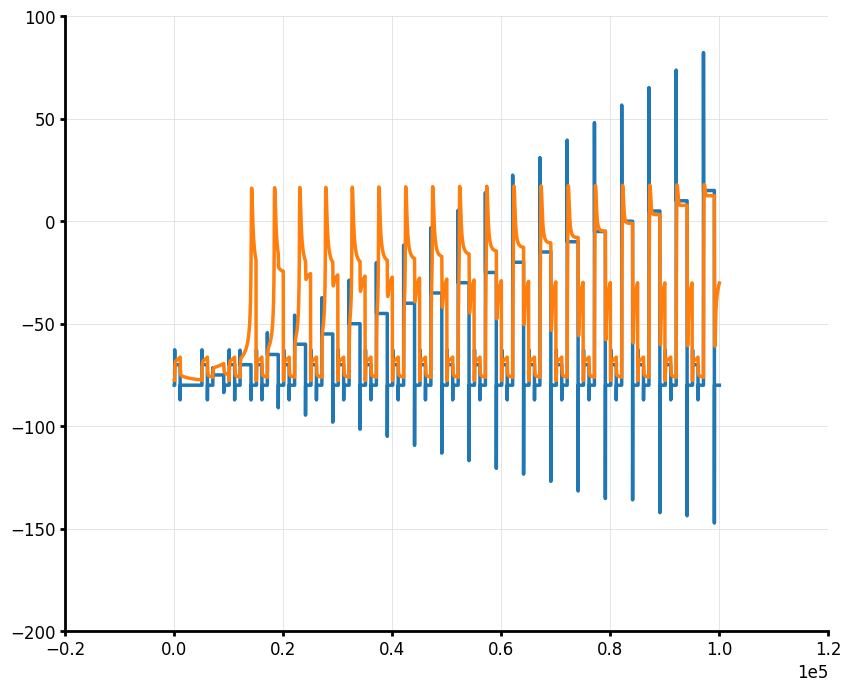

In [16]:
plt.plot(i.v_p)
plt.plot(i.v_m)

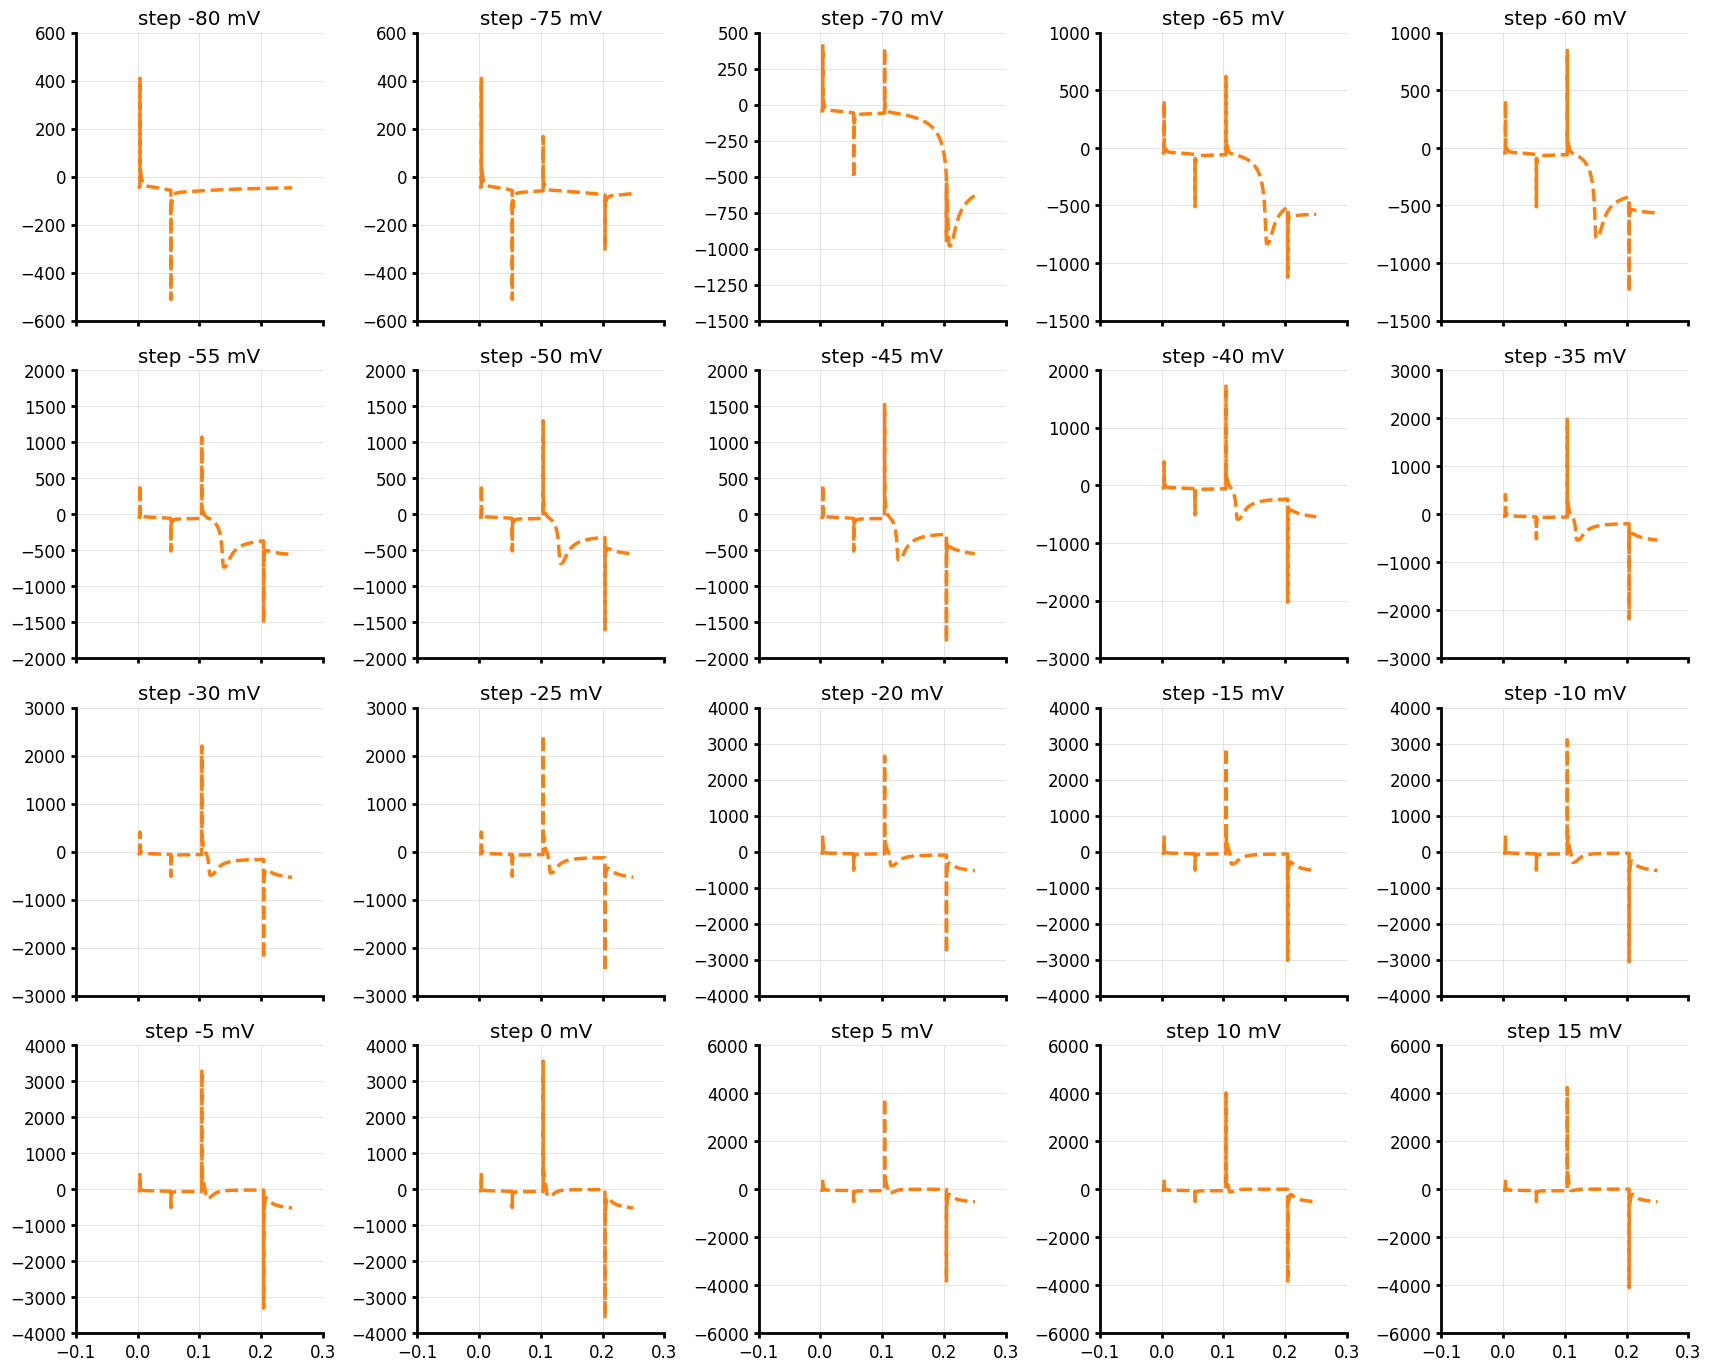

In [17]:
    I_out = i.I_out
    real_data_all = r_dat.I_out
    n_sections = 20
    split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)

    nrows, ncols = 4, 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

    
    dt = 5e-5

    colors = ['0.3', 'C1']

    i_global = 0

    for i_row in range(nrows):
        for i_col in range(ncols):
            ax = axes[i_row, i_col]
            plt.sca(ax)

            i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
            slice_current = slice(i_start, i_end)

            I_out_current = I_out[slice_current]
            data_current  = real_data_all[slice_current]
            t = np.arange(len(data_current)) * dt

            #plt.plot(t, data_current, color=colors[0])
            plt.plot(t, I_out_current,"--", color=colors[1])#, lw=0.5,)

            #plt.grid()

            step_value = -80 + 5 * i_global
            title = f'step {step_value} mV'
            plt.title(title)

            i_global += 1
            #plt.xlim(0.1,0.125)
            #plt.ylim(-1300, 300)



In [ ]:
plt.plot(i.I_out)
plt.plot(r_dat.I_out, "--")

In [604]:
#pd.DataFrame(np.array([art_data.t, i.I_out]).T, columns=['t', 'I_out']).to_csv('../../data/training/art_data_linked_minf_tau.csv')

In [578]:
#%matplotlib notebook
#%matplotlib inline

In [23]:
p1 = 99.1744;
p2 = 12.8321;
p3 = 0.0039;
p4 = -8.2139;
m1 = p1;
m2 = p2;
m3 = p1 * p3;
m4 = 1.0 / (1.0 / p2  + 1.0 / p4);
tau_m_const =  0.0374383;

w1 = 0.0062605;
w2 = -21.6256454;
w3 = 17575.4542604;
w4 = 6.7241405;
tau_h_const = 0.1999625;
h1 = w1;
h2 = w2;
h3 = w1 * w3;
h4 = 1.0 / (1.0 / w2  + 1.0 / w4); 

v1 = 0.00064626;
v2 = -69.41735068;
v3 = 17575.45426044;
v4 = 6.72414053;
tau_j_const = 1.32187439;

j1 = v1;
j2 = v2;
j3 = v1 * v3;
j4 = 1.0 / (1.0 / v2 + 1.0 / v4);
alpha_h = h1 * np.exp( ( V ) / h2 );
beta_h = h3 * np.exp( ( V ) / h4 );
h_inf = ( alpha_h / ( alpha_h + beta_h ) );
tau_h = ( ( 1. / ( alpha_h + beta_h ) ) + tau_h_const );
    
    
    
    
alpha_j = j1 * np.exp( ( V ) / j2 );
beta_j = j3 * np.exp( ( V ) / j4 );
j_inf = ( alpha_j / ( alpha_j + beta_j ) );
tau_j = ( ( 1. / ( alpha_j + beta_j ) ) + tau_j_const );
    
    
alpha_m = m1 * np.exp( ( V ) / m2 );
beta_m = m3 * np.exp( ( V ) / m4 );
m_inf = alpha_m / ( alpha_m + beta_m );
tau_m = ( ( 1. / ( alpha_m + beta_m ) ) + tau_m_const );
    
#g_Na = x_NA[0] * x_scale_conductance[6]; #// nS_per_pF (in i_Na)
#i_Na = g_Na * Y[14] * Y[14] * Y[14] * Y[12] * Y[13] * ( Y[0] - E_Na );

In [24]:
A = pd.read_csv('../../src/model_ctypes/ina_pipette_linked_m_tau/legend_constants.csv', index_col='name').value

In [25]:
m1

99.1744

In [27]:
A['a0_m'] = m1
A['b0_m'] = m3
A['s_m'] = m2
A['delta_m'] = -m4

A['a0_h'] = h1
A['b0_h'] = h3
A['s_h'] = -h2
A['delta_h'] = h4

A['a0_j'] = j1
A['b0_j'] = j3
A['s_j'] = -j2
A['delta_j'] = j4

A['tau_j_const'] = tau_j_const

A['R']  = 100000000.
A['R_f'] = 15000000.
A['g_max'] = 8300.4
A

name
c_p            4.502963e-12
c_m            2.473016e-11
a0_m           9.917440e+01
b0_m           3.867802e-01
delta_m        2.282309e+01
s_m            1.283210e+01
a0_h           6.260500e-03
b0_h           1.100311e+02
delta_h        9.758335e+00
s_h            2.162565e+01
a0_j           6.462600e-04
b0_j           1.135831e+01
delta_j        7.445336e+00
s_j            6.941735e+01
tau_j_const    1.321874e+00
R              1.000000e+08
R_f            1.500000e+07
g_max          8.300400e+03
g_leak         4.812443e-01
tau_z          1.000340e-04
x_c_comp       9.929933e-02
x_r_comp       1.020000e+00
alpha          7.500000e-01
v_off         -2.000000e+00
v_rev          1.800000e+01
v_c           -8.000000e+01
Name: value, dtype: float64

In [28]:
A.to_csv('../../src/model_ctypes/ina_pipette_linked_m_tau/legend_constants_cc.csv')

In [22]:
V = np.arange(-100, 20)
real_m_h = give_new_m_h(V, C_old)
real_tau = give_tau(V, C_old)

real_data_list =  [[real_m_h['m'], real_m_h['h'] ],
                  [real_tau['tau_m']],
                  [real_tau['tau_h']],
                  [real_tau['tau_j']]]

In [585]:
items_clancy = [[m_inf, h_inf , j_inf],
                  [tau_m/1000],
                  [tau_h/1000],
                  [tau_j/1000]]

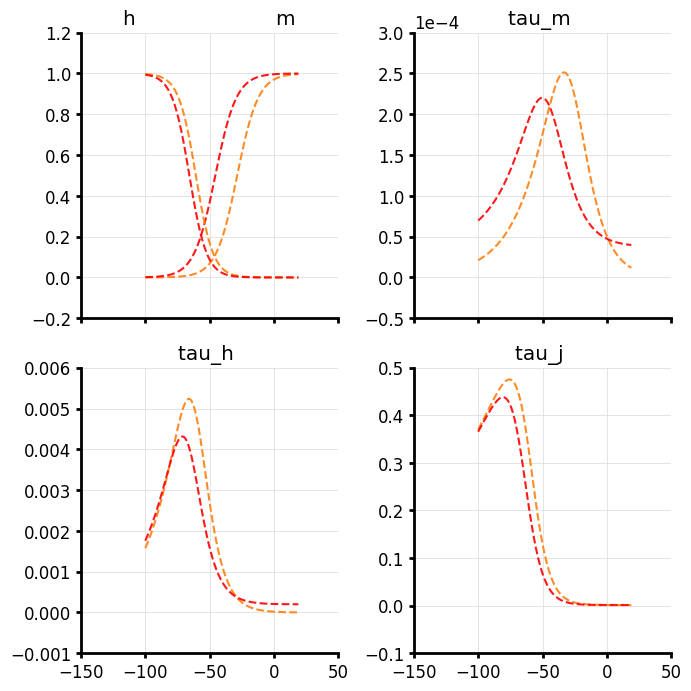

In [586]:
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols),
                             sharex=True)

axes = axes.flatten()

#for items, ax in zip(real_data_list, axes):
 #   for item in items:
 #       ax.plot(V, item,alpha = 1,color = colors[0], lw = 1.5)
col = 0

#K = pd.concat([sol_best['common'][:-7]*C[:-10],sol_best['common'][-7:]])
m_h = give_m_h(V, C)
tau = give_new_tau(V, C)


items_list = [[m_h['m'], m_h['h'] ],
                  [tau['tau_m']],
                  [tau['tau_h']],
                  [tau['tau_j']]]

 
    
labels_list = [['0', 'h                      m'],
                   ['tau_m '],
                   ['tau_h '],
                   ['tau_j ']]
    
            
for items,items2, ax, labels in zip(items_list, items_clancy, axes, labels_list):
    for item,item2, label in zip(items,items2, labels):
        ax.plot(V, item,lw = 1.5, alpha=0.9, linestyle = "--", color = colors[1])
        ax.plot(V, item2,lw = 1.5, alpha=0.9, linestyle = "--", color = 'r')
        ax.set_title(label)


In [39]:
%matplotlib inline

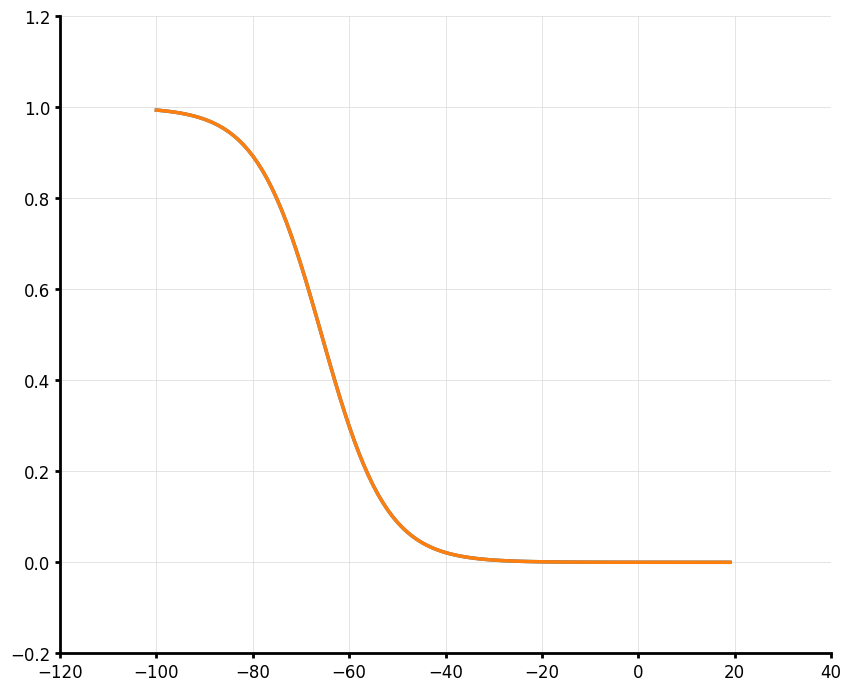

In [45]:
plt.plot(V, j_inf)
plt.plot(V, h_inf)

# Load results

In [28]:
case = "210802_154038"
dirname_results = '../../results/ina_pipette/'
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [29]:
config = result['config'].copy()
sol_best = result['sol_best'].copy()
phenotype_best = result['phenotype_best'].copy()
sol_best

ec_name  g_name     
common   c_p             1.315678
         c_m             0.106060
         a0_m            0.339564
         b0_m            0.386016
         delta_m         0.365877
         s_m             0.326748
         a0_h            2.879543
         b0_h            0.202048
         delta_h         0.295963
         s_h             4.289826
         a0_j            0.785184
         b0_j            0.205875
         delta_j         3.697135
         s_j             4.043061
         tau_j_const     1.592980
         R               6.674831
         R_f             9.188491
         g_max           8.730734
         g_leak          2.801818
         tau_z           5.138518
         v_half_m       32.024824
         v_half_h       90.850248
         k_m             2.887440
         k_h             2.077719
         x_c_comp        0.922082
         x_r_comp        0.456303
         alpha           0.725084
trace    v_off           3.561412
Name: 0, dtype: float64

In [85]:
gene.

dict_values([{'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True}, {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': Tr

In [33]:
import pytest

In [74]:
def calculate_gammas(upper_bound_global, bounds, mask_log10_multiplier):
    if upper_bound_global <= 0:
        raise Exception('The upper global bound should be positive')
    if len(bounds) != len(mask_log10_multiplier):
        raise Exception('The size of bounds and the mask of the multiplier should be the same.')
    
    gammas = np.zeros(len(bounds))
    for numb, gene_bounds in enumerate(bounds):
        lb, ub = gene_bounds
        if mask_log10_multiplier[numb]:
            assert lb > 0 and ub > 0
            gammas[numb] += np.log(ub / lb) / upper_bound_global
        else:
            gammas[numb] += (ub - lb) / upper_bound_global
    return gammas
    

In [77]:
b = [[0,2], [4, 6], [-7, 38]]
m = [True, False, False]

In [78]:
calculate_gammas(1, b, m)

AssertionError: 

In [30]:
gene = config['runtime']['genes_dict']['common']

In [102]:
dump_loss = result['dump']['dump']['loss'].reshape((-1, config['runtime']['n_organisms']))

In [109]:
config['runtime']['genes_dict']

{'common': {'c_p': {'bounds': [0.1, 10],
   'gamma': 0.004,
   'is_multiplier': True},
  'c_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_j': {'bounds': [0.1, 10], 'gamma': 0.0

In [108]:
config['runtime']['legend']

{'states': name
 v_comp   -80.0
 v_p      -80.0
 v_m      -80.0
 m          0.0
 h          1.0
 j          1.0
 I_out      0.0
 Name: value, dtype: float64,
 'constants': name
 c_p            4.502963e-12
 c_m            2.473016e-11
 a0_m           2.736956e+03
 b0_m           7.135904e+01
 delta_m        2.061570e+01
 s_m            9.306083e+00
 a0_h           4.604052e-01
 b0_h           5.038082e+02
 delta_h        1.523480e+01
 s_h            2.196405e+01
 a0_j           4.475461e-01
 b0_j           2.061333e+04
 delta_j        4.115303e+00
 s_j            1.673159e+02
 tau_j_const    7.794313e-04
 R              2.494677e+07
 R_f            3.264214e+05
 g_max          4.392204e+05
 g_leak         4.812443e-01
 tau_z          1.000340e-04
 v_half_m       2.435802e+01
 v_half_h       5.969117e+01
 k_m            5.666770e+00
 k_h            5.507771e+00
 x_c_comp       9.929933e-02
 x_r_comp       1.020000e+00
 alpha          7.500000e-01
 v_off         -2.000000e+00
 v_rev     

In [106]:
dump_loss[0].reshape(config['runtime']['comm_size'], -1)

array([[1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473]])

In [82]:
assert np.all(np.diff(loss))<=0

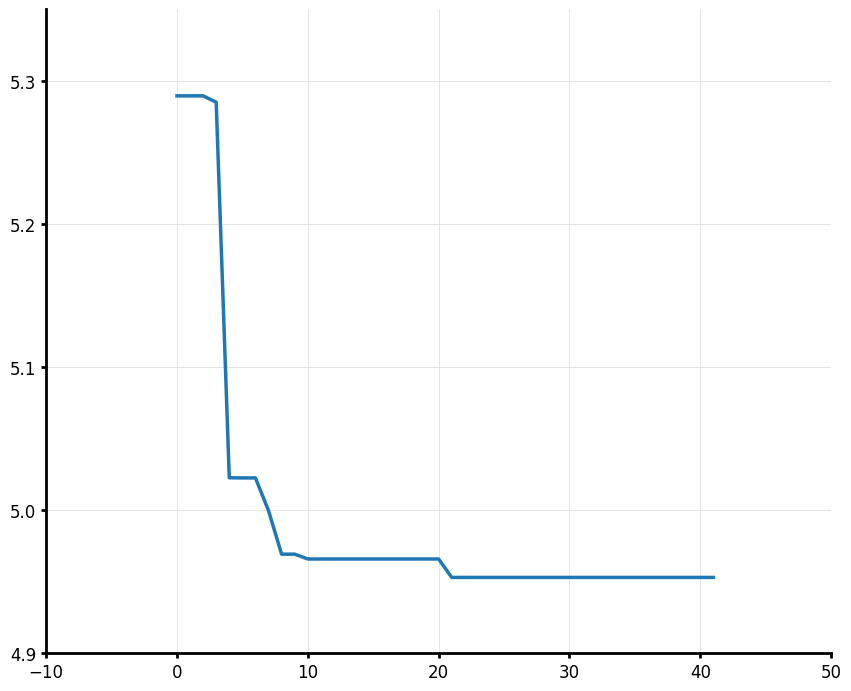

In [83]:
loss = result['dump']['best']['loss']
plt.plot(np.log(loss))
#plt.xlim(40, 100)

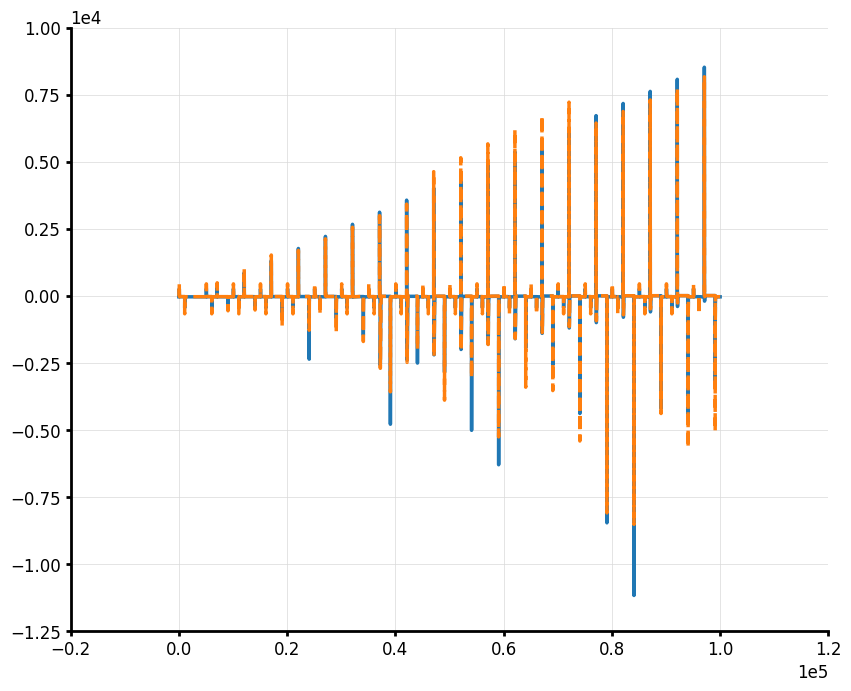

In [69]:
plt.plot(art_data.I_out)
best_phenotype = result['phenotype_best']['trace'].I_out
plt.plot(best_phenotype, "--")


In [93]:
# names of genes
m_index = config['runtime']['m_index']
dump_genes = result['dump']['dump']['genes'].reshape((-1, len(m_index)))
n_organisms = config['runtime']['n_organisms']
n_generations = len(dump_genes) // n_organisms
# multiindex (generation, numb_of_organism) 
index = pd.MultiIndex.from_product([range(n_generations), range(n_organisms)],
                                   names=['epoch', 'org'])

dump_genes = pd.DataFrame(dump_genes, columns=m_index, index=index)

dump_loss = result['dump']['dump']['loss'].reshape((n_generations, config['runtime']['n_organisms']))

In [94]:
epochs = []
for k in range(n_generations):
    for l in range(n_organisms):
        epochs.append(k)

No handles with labels found to put in legend.


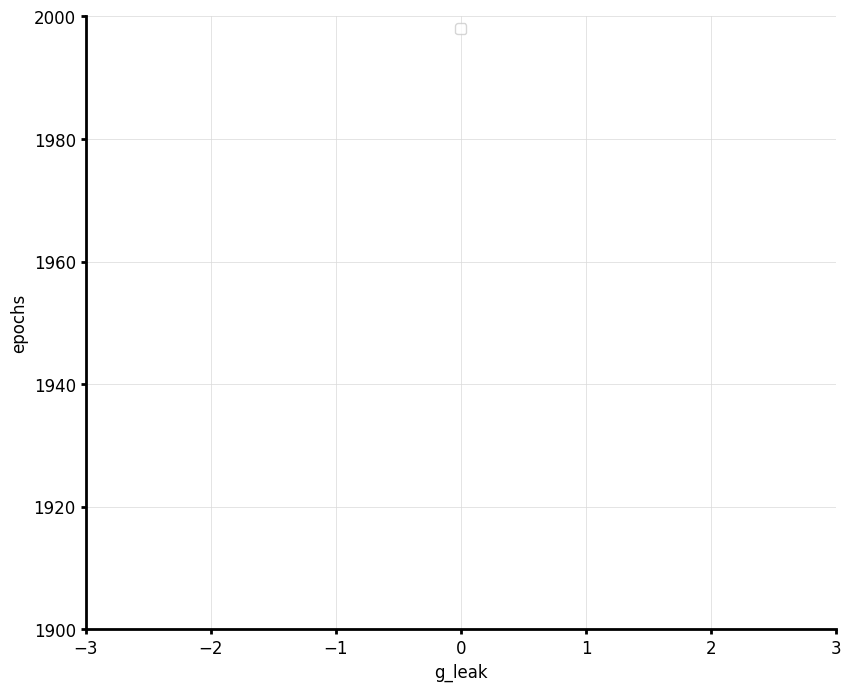

In [95]:
plt.plot(np.log(result['dump']['dump']['genes'][18::28]) , epochs, '.', alpha=0.1)
plt.plot()
plt.xlabel('g_leak')
plt.ylabel('epochs')
#plt.xlim(0,2)
plt.ylim(1900, 2000)
plt.legend()

No handles with labels found to put in legend.


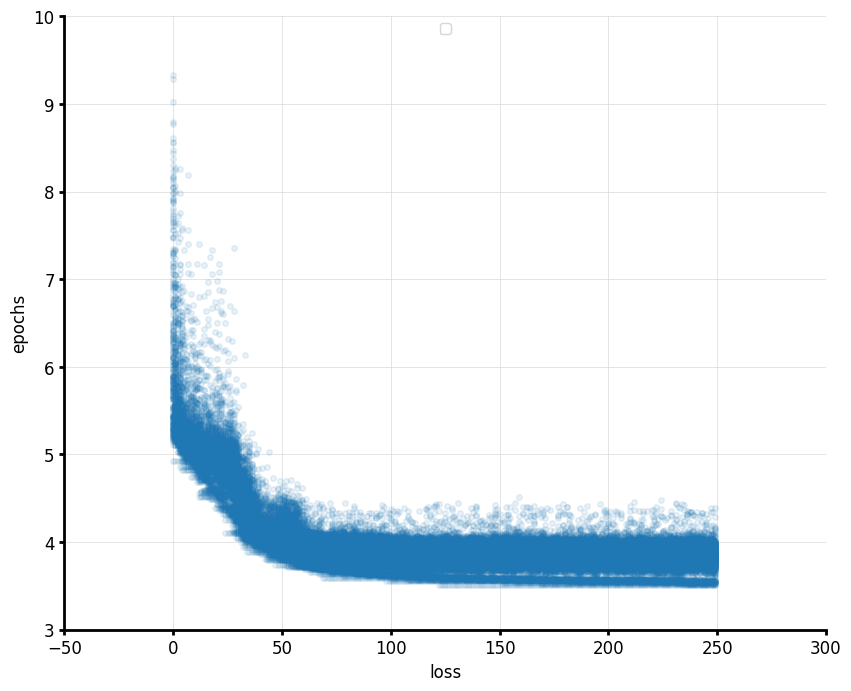

In [47]:
plt.plot( epochs, np.log(result['dump']['dump']['loss']) , '.', alpha=0.1)
plt.plot()
plt.xlabel('loss')
plt.ylabel('epochs')
#plt.xlim(3.5,3.8)
#plt.ylim(500, 600)
plt.legend()

In [9]:
from pypoptim.algorythm.ga import GA
from ina_model import InaModel
from solmodel import SolModel
from pypoptim.algorythm.ga.mutation import cauchy_mutation

In [10]:
import seaborn as sns

In [11]:
config

{'n_organisms': 256,
 'n_elites': 16,
 'n_generations': 5000,
 'output_folder_name': '../../results/ina/',
 'loss': 'RMSE',
 'columns_control': ['I_out'],
 'columns_model': ['I_out'],
 'column_stim_protocol': ['v'],
 'filename_so': '../../src/model_ctypes/ina/ina.so',
 'filename_legend_states': '../../src/model_ctypes/ina/legend_states.csv',
 'filename_legend_constants': '../../src/model_ctypes/ina/legend_constants.csv',
 'filename_legend_algebraic': '../../src/model_ctypes/ina/legend_algebraic.csv',
 'filename_protocol': '../../data/protocols/protocol_trace.csv',
 'filename_initial_state_protocol': '../../data/protocols/protocol_initial_state.csv',
 'experimental_conditions': {'common': {'params': {'c_p': {'bounds': [0.1, 10],
     'gamma': 0.15,
     'is_multiplier': True},
    'c_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'a0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'b0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': Tr

In [12]:
filename_so = "../../src/model_ctypes/ina/ina.so"
# filename_so = config['runtime']['filename_so_abs']
model = InaModel(filename_so)
SolModel.model = model
SolModel.config = config
#config['runtime']['gammas']+=1


In [93]:
dirname = '../../src/model_ctypes/ina/'

C = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')
column_names = C.T.columns[:-2]

In [114]:

gammas = np.zeros_like(config['runtime']['gammas'])
gammas+=1
ga_optim = GA(SolModel,
              config['runtime']['bounds'],
              #config['runtime']['gammas'],
              gammas,
              config['runtime']['mask_multipliers'],
              crossover_rate=0
              )
sol = ga_optim.generate_solution()
print('gammas = ',gammas)

genes_initial = sol.x
genes_transformed = ga_optim._transform_genes(genes_initial)
bounds_transformed = ga_optim._bounds_transformed

result = []
for _ in range(25600):
    genes_mutated = cauchy_mutation(genes=genes_transformed,
                                bounds=bounds_transformed, 
                                gamma = gammas,
                                        )

    genes = ga_optim._transform_genes_back(np.asfarray(genes_mutated))
    result.append(genes)
result = pd.DataFrame(result, columns=column_names)

gammas =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [115]:
gammas1 = np.zeros_like(config['runtime']['gammas'])
gammas1+=1
gammas1[:20]-=0.5

ga_optim1 = GA(SolModel,
              config['runtime']['bounds'],
              #config['runtime']['gammas'],
              gammas1,
              config['runtime']['mask_multipliers'],
              crossover_rate=0
              )
sol1 = ga_optim1.generate_solution()
print('gammas = ',gammas1)

genes_initial1 = sol1.x
genes_transformed1 = ga_optim._transform_genes(genes_initial1)
bounds_transformed1 = ga_optim._bounds_transformed

result1 = []
for _ in range(25600):
    genes_mutated1 = cauchy_mutation(genes=genes_transformed1,
                                bounds=bounds_transformed1, 
                                gamma = gammas1,
                                        )

    genes1 = ga_optim._transform_genes_back(np.asfarray(genes_mutated1))
    result1.append(genes1)
result1 = pd.DataFrame(result1, columns=column_names)

gammas =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]


In [92]:
for k in range(20):
    plt.figure()
    sns.distplot(np.log10(result[column_names[k]]), color='C1')
    plt.axvline(np.log10(genes_initial[k]), color='C1')
    
    sns.distplot(np.log10(result1[column_names[k]]), color='C2')
    plt.axvline(np.log10(genes_initial1[k]), color='C2')
    plt.title(column_names[k])

for k in range(20,28):
    plt.figure()
    sns.distplot(result[column_names[k]], color='C1')
    plt.axvline(genes_initial[k], color='C1')
    
    sns.distplot(result1[column_names[k]],color='C2')
    plt.axvline(genes_initial1[k], color='C2')
    plt.title(column_names[k])

NameError: name 'sns' is not defined

<Figure size 840x680 with 0 Axes>

<ipython-input-17-6beea4687118>:1: RuntimeWarning: invalid value encountered in log10
  sns.distplot(np.log10(result))
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/nik/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/nik/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:>

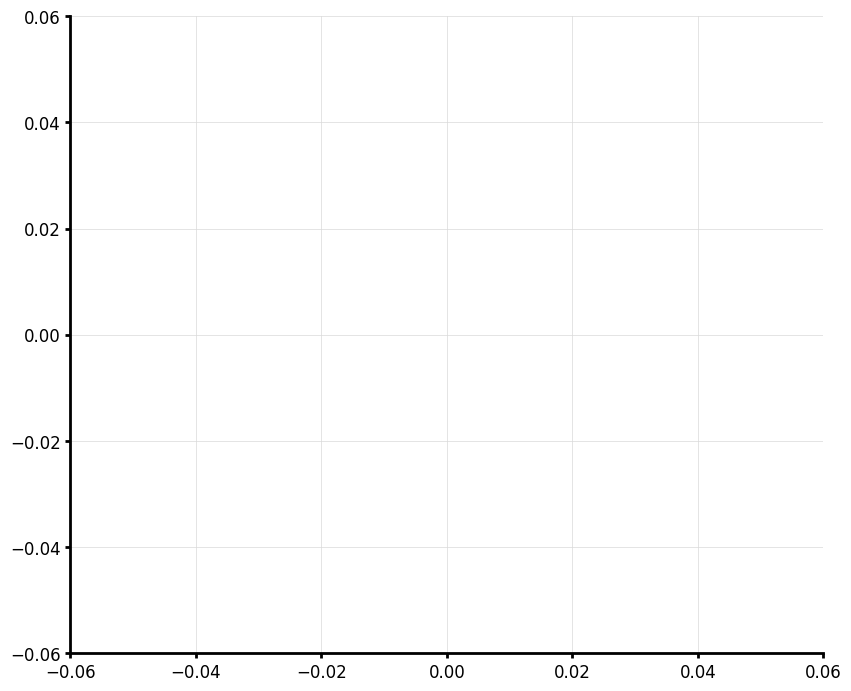

In [17]:
sns.distplot(np.log10(result))

In [14]:
generations = np.arange(n_generations)

No handles with labels found to put in legend.


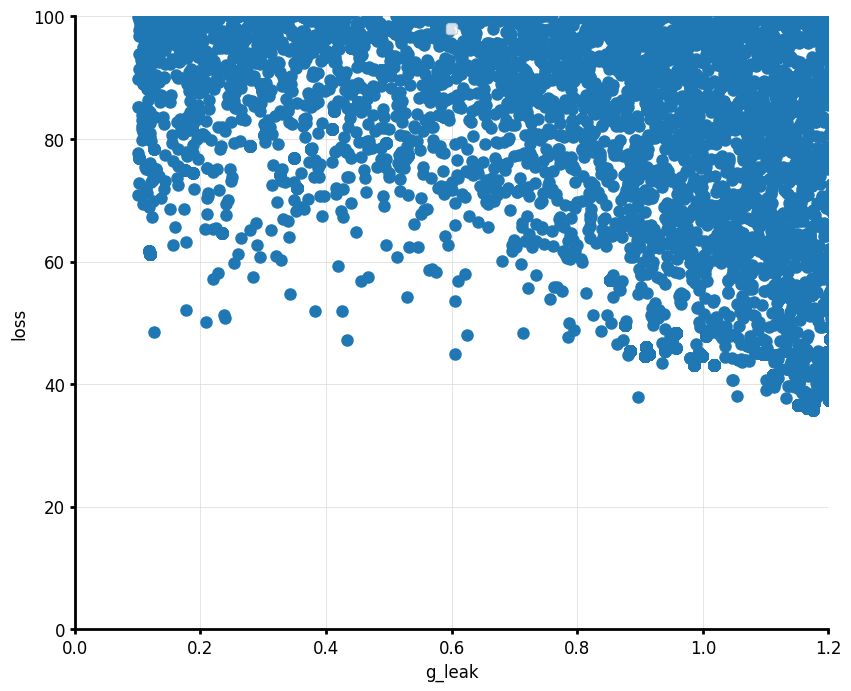

In [28]:
plt.scatter(result['dump']['dump']['genes'][18::28],result['dump']['dump']['loss'] )
plt.xlabel('g_leak')
plt.ylabel('loss')
plt.xlim(0, 1.2)
plt.ylim(0,100)
plt.legend()

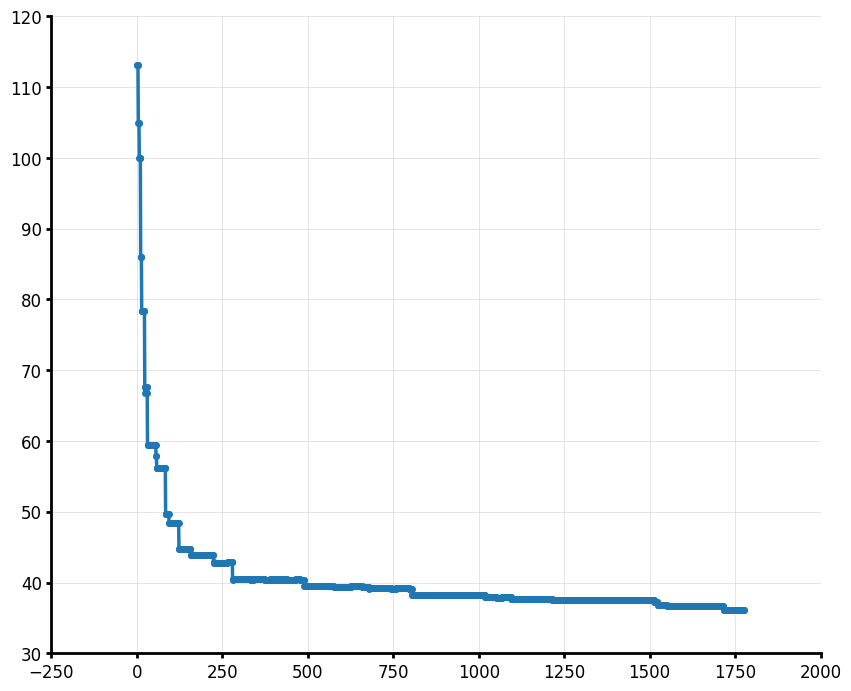

In [29]:
loss = result['dump']['best']['loss']
plt.plot(loss, '.-')

In [ ]:
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [ ]:
dump_genes = pd.DataFrame(result['dump']['best']['genes'].reshape(-1, len(sol_best)),
                          columns=config['runtime']['m_index'])
dump_genes

In [ ]:
plt.scatter(dump_genes['common']['g_leak'],loss)
plt.ylabel('loss')
plt.xlabel('g_leak')
plt.legend()

# Recreate solution

In [99]:
sys.path.append('src/model')
from ina_model import InaModel
from solmodel import SolModel

In [14]:
C.T.columns


AttributeError: 'Series' object has no attribute 'columns'

In [15]:
sol_best['common']['g_leak'] =1

In [16]:
sol_best1 = sol_best.copy()
sol_best1

ec_name  g_name     
common   c_p             0.856344
         c_m             1.340119
         a0_m            0.230524
         b0_m            8.232682
         delta_m         2.961568
         s_m             1.003738
         a0_h            1.153501
         b0_h            3.387604
         delta_h         1.920495
         s_h             0.546435
         a0_j            0.368656
         b0_j            0.430863
         delta_j         0.115069
         s_j             0.138986
         tau_j_const     0.175007
         R               0.445268
         R_f             6.289404
         g_max           2.553292
         g_leak          1.000000
         tau_z           0.395523
         v_half_m       23.921037
         v_half_h       85.393364
         k_m             5.111284
         k_h             3.477428
         x_c_comp        0.114182
         x_r_comp        0.994091
         alpha           0.741560
trace    v_off           3.092132
Name: 0, dtype: float64

In [22]:
config['runtime']

{'config_path': '/home/nik/Documents/comparison/INa_full_trace/pypoptim/configs/configs_pipette',
 'filename_so_abs': '/home/nik/Documents/comparison/INa_full_trace/src/model_ctypes/ina_pipette/ina.so',
 'sha': '48eac0863d7273f57fd6d390978be70194f3e86e',
 'genes_dict': {'common': {'c_p': {'bounds': [0.1, 10],
    'gamma': 0.004,
    'is_multiplier': True},
   'c_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'a0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'b0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'delta_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   's_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'a0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'b0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'delta_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   's_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_m

In [28]:
filename_so = "../../src/model_ctypes/ina_pipette/ina.so"
model = InaModel(filename_so)

SolModel.model = model
SolModel.config = config.copy()

sol = SolModel(x=C[:28])

In [93]:
sol.x

array([ 4.502963e-12,  2.473016e-11,  2.736956e+03,  7.135904e+01,
        2.061570e+01,  9.306083e+00,  4.604052e-01,  5.038082e+02,
        1.523480e+01,  2.196405e+01,  4.475461e-01,  2.061333e+04,
        4.115303e+00,  1.673159e+02,  7.794313e-04,  2.494677e+07,
        3.264214e+05,  4.392204e+05,  4.812443e-01,  1.000340e-04,
        2.435802e+01,  5.969117e+01,  5.666770e+00,  5.507771e+00,
        9.929933e-02,  1.020000e+00,  7.500000e-01, -2.000000e+00])

In [91]:
sol_copy = SolModel(sol.x.copy())

In [96]:
sol_copy.update()
sol_copy

Solution = {
    x    = [ 4.502963e-12  2.473016e-11  2.736956e+03  7.135904e+01  2.061570e+01
  9.306083e+00  4.604052e-01  5.038082e+02  1.523480e+01  2.196405e+01
  4.475461e-01  2.061333e+04  4.115303e+00  1.673159e+02  7.794313e-04
  2.494677e+07  3.264214e+05  4.392204e+05  4.812443e-01  1.000340e-04
  2.435802e+01  5.969117e+01  5.666770e+00  5.507771e+00  9.929933e-02
  1.020000e+00  7.500000e-01 -2.000000e+00],
    y    = 203.8014344029245,
    data = {'phenotype': {'trace': name   v_comp   v_p        v_m         m         h         j     I_out
0         0.0   0.0   0.000000  0.000000  0.000000  0.000000  0.000000
1       -80.0 -80.0  13.144471  0.998666  0.000002  0.000002 -0.000153
2       -80.0 -80.0  13.144490  0.998666  0.000002  0.000002 -0.000153
3       -80.0 -80.0  13.144490  0.998666  0.000002  0.000002 -0.000153
4       -80.0 -80.0  13.144490  0.998666  0.000002  0.000002 -0.000153
...       ...   ...        ...       ...       ...       ...       ...
99995   -80.0 

In [81]:
len(sol.data['phenotype']['trace']) ==len(art_data)

True

In [98]:
ls '../../results/ina_pipette/210730_1'

ls: cannot access '../../results/ina_pipette/210730_130603/': No such file or directory


In [46]:
sol.update()

In [21]:
sol

Solution = {
    x    = [ 4.502963e-12  2.473016e-11  2.736956e+03  7.135904e+01  2.061570e+01
  9.306083e+00  4.604052e-01  5.038082e+02  1.523480e+01  2.196405e+01
  4.475461e-01  2.061333e+04  4.115303e+00  1.673159e+02  7.794313e-04
  2.494677e+07  3.264214e+05  4.392204e+05  4.812443e-01  1.000340e-04
  2.435802e+01  5.969117e+01  5.666770e+00  5.507771e+00  9.929933e-02
  1.020000e+00  7.500000e-01 -2.000000e+00  1.800000e+01 -8.000000e+01],
    y    = None,
    data = {'phenotype': {}}
}

In [31]:
I_best = sol['phenotype']['trace']['I_out']

In [32]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

37.85671042519609

In [33]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

37.85671042519609

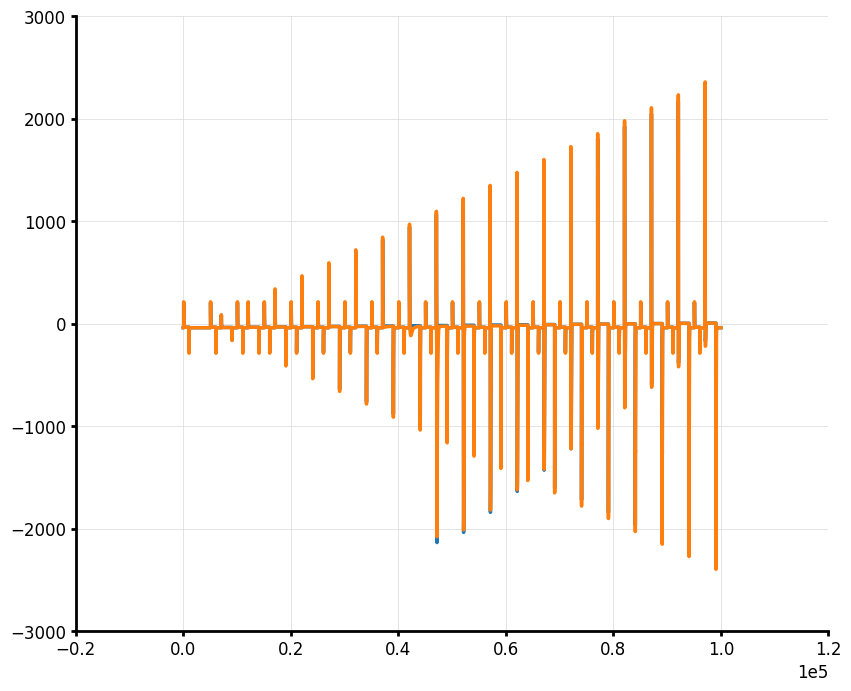

In [35]:
plt.plot(sol['phenotype']['trace']['I_out'])
plt.plot(art_data.I_out)

In [ ]:
np.

In [9]:
art_data = pd.read_csv('../../data/training/art_data_right_j.csv')

<ipython-input-61-8aa69ea2a990>:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


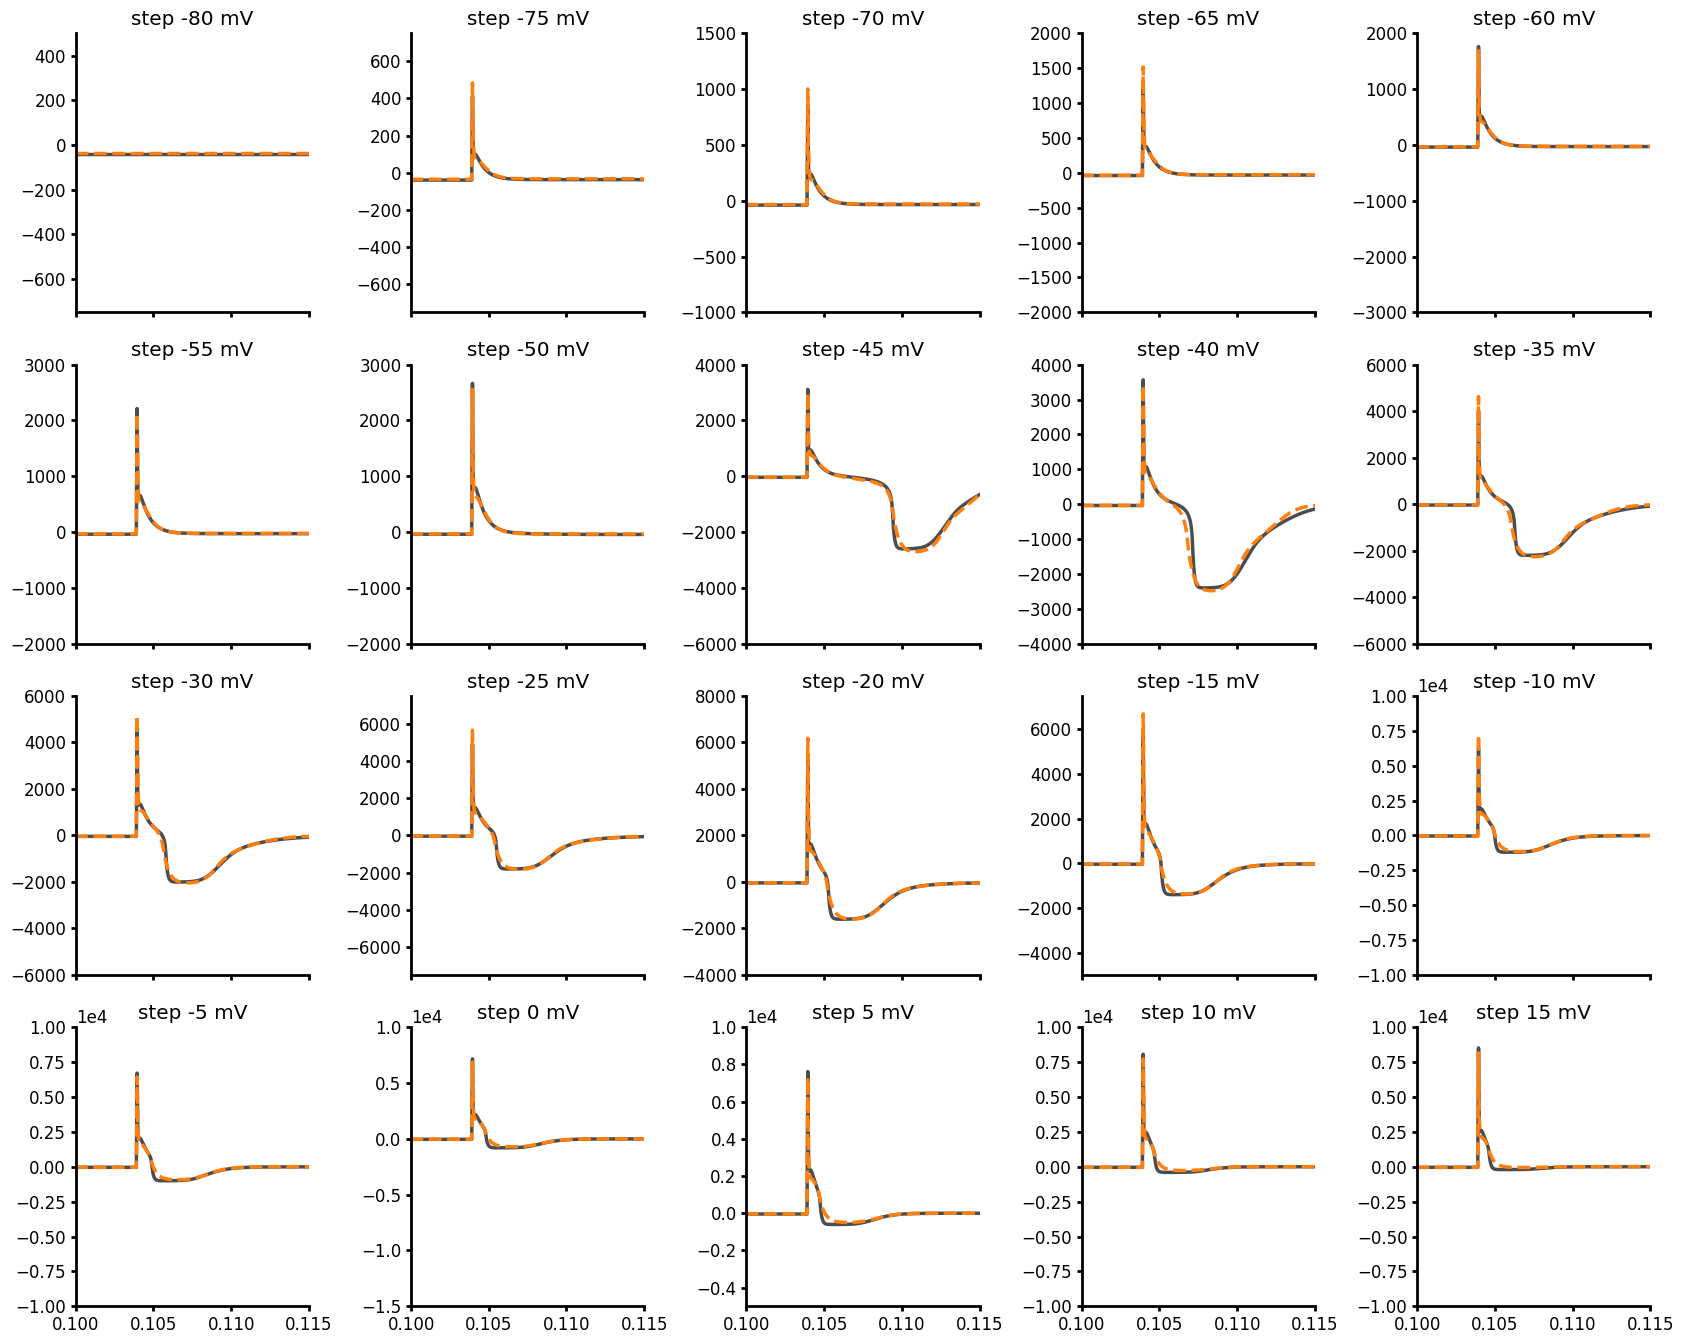

In [61]:
    #I_out = i.I_out#sol['phenotype']['trace']['I_out']
    I_out = best_phenotype
    real_data_all = art_data.I_out
    n_sections = 20
    split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)

    nrows, ncols = 4, 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

    
    dt = 5e-5

    colors = ['0.3', 'C1']

    i_global = 0

    for i_row in range(nrows):
        for i_col in range(ncols):
            ax = axes[i_row, i_col]
            plt.sca(ax)

            i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
            slice_current = slice(i_start, i_end)

            I_out_current = I_out[slice_current]
            data_current  = real_data_all[slice_current]
            t = np.arange(len(data_current)) * dt

            plt.plot(t, data_current, color=colors[0])
            plt.plot(t, I_out_current, "--", color=colors[1])#, lw=0.5,)

            plt.grid()

            step_value = -80 + 5 * i_global
            title = f'step {step_value} mV'
            plt.title(title)

            i_global += 1
            plt.xlim(0.1,0.115)
            #plt.ylim(-2000, 110)
            
    plt.tight_layout()
    
    
    
    #folder_save = "../../pictures/results/"
    #filename_prefix = ar[k].split('.')[0]
    #plt.title(filename_prefix)
    #plt.show()
    
    #filename_save = os.path.join(folder_save, f'{filename_prefix}_grid.png')
    filename_save = '../../pictures/results/art_data_n_256_best_16_epochs_1000_leak_1.png'
    #plt.savefig(filename_save, dpi=300)

In [36]:
#pd.DataFrame(np.array([art_data.t,i.I_out]).T, columns=['t', 'I_out']).to_csv('../../data/training/art_data_right_j_pipette.csv')

In [32]:
art_data

Unnamed: 0        t      I_out
0               0  0.00000 -38.993896
1               1  0.00005 -38.993896
2               2  0.00010 -38.993896
3               3  0.00015 -38.993896
4               4  0.00020 -38.993896
...           ...      ...        ...
99995       99995  4.99975 -38.993892
99996       99996  4.99980 -38.993892
99997       99997  4.99985 -38.993892
99998       99998  4.99990 -38.993892
99999       99999  4.99995 -38.993892

[100000 rows x 3 columns]

In [4]:
sys.path.append('../mpi_scripts/')
from ina_model import InaModel
from solmodel import SolModel

NameError: name 'sys' is not defined

In [33]:
dump_genes.iloc[-1]

ec_name  g_name     
common   c_p             3.653771
         c_m             1.691761
         a0_m            2.183544
         b0_m            0.923361
         delta_m         0.647492
         s_m             4.952795
         a0_h            9.828578
         b0_h            1.099444
         delta_h         0.602708
         s_h             8.976248
         a0_j            0.625575
         b0_j            0.147311
         delta_j         0.811035
         s_j             1.034767
         tau_j_const     1.282862
         R               1.070311
         R_f             2.210616
         g_max           9.539465
         g_leak          0.119862
         tau_z           0.948702
         v_half_m       23.882189
         v_half_h       83.186072
         k_m             5.042149
         k_h             3.179943
         x_c_comp        0.157672
         x_r_comp        1.036790
         alpha           0.795904
trace    v_off          -3.450192
Name: 999, dtype: float64

In [46]:
5000+77+2000+2000

9077

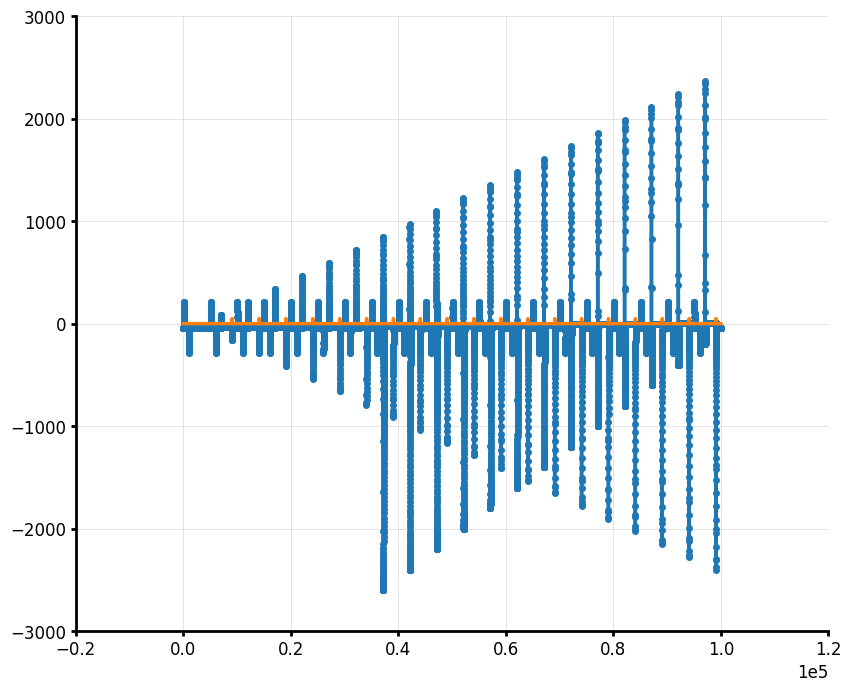

In [65]:
start = 9078
end = 9098
weight = np.zeros_like(art_data.I_out)
weight+=1   
for k in range(19):
    weight[start:end]*= 50
    start+=5000
    end+=5000
plt.plot(art_data.I_out, '.-')
plt.plot(weight)
#plt.axvline(9078, color = 'k')
#plt.axvline(9098, color = 'k')
#plt.xlim(start,end)
#plt.ylim(-200,0)

5000.0

In [66]:
W = pd.DataFrame(np.array([art_data.t.values, weight]).T, columns=['t','w'])
W.to_csv('../../data/sample_weights/weight_50_for_tails.csv')

In [67]:
pd.read_csv('../../data/sample_weights/weight_50_for_tails.csv').w

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: w, Length: 100000, dtype: float64

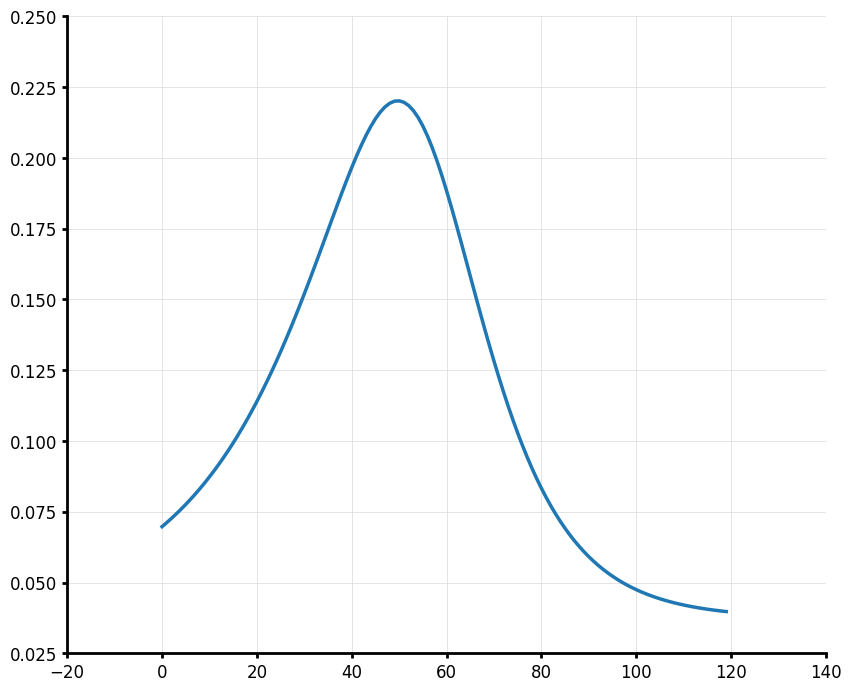

In [42]:
plt.plot(tau_m)

In [ ]:
case = ''
dirname_results = '../../results/ina_pipette/'
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])
config = result['config'].copy()
sol_best = result['sol_best'].copy()

In [6]:
sys.path.append('../mpi_scripts/')
from ina_model import InaModel
from solmodel import SolModel

In [ ]:
filename_so = config['runtime']['filename_so_abs']
model = InaModel(filename_so)

SolModel.model = model
SolModel.config = config.copy()


In [103]:
def give_sol_and_phenotype(cases, dirname_results, colors = ['0.3', 'C1', 'C2','C3']):
    sol_best_list = []
    phenotype_best_list = []
    i_glob = 1
    for case in cases:
        result = collect_results(case, dirname_results, dump_keys=['best'])#, 'dump'])
        config = result['config'].copy()
        sol_best = result['sol_best'].copy()
        sol_best_list.append(sol_best)
        phenotype_best = result['phenotype_best'].copy()
        phenotype_best_list.append(phenotype_best)
        loss = result['dump']['best']['loss']
        plt.plot(np.log10(loss), '.-', label = case, color = colors[i_glob])
        i_glob+=1
    #plt.xlabel('epochs')
    #plt.ylabel('log10(loss)')
    #plt.legend()
    return sol_best_list, phenotype_best_list


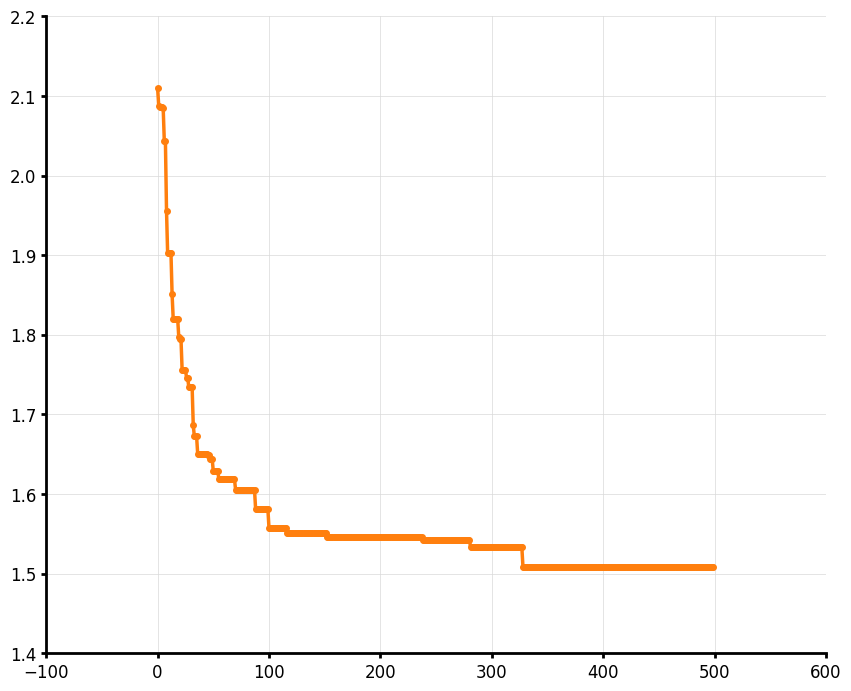

In [87]:
sol, phen = give_sol_and_phenotype([ '210804_160554'], dirname_results =  '../../results/ina_pipette_linked_m_tau/')
data = pd.read_csv('../../data/training/art_data_linked_m_tau.csv')

<ipython-input-91-9c747faabb13>:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


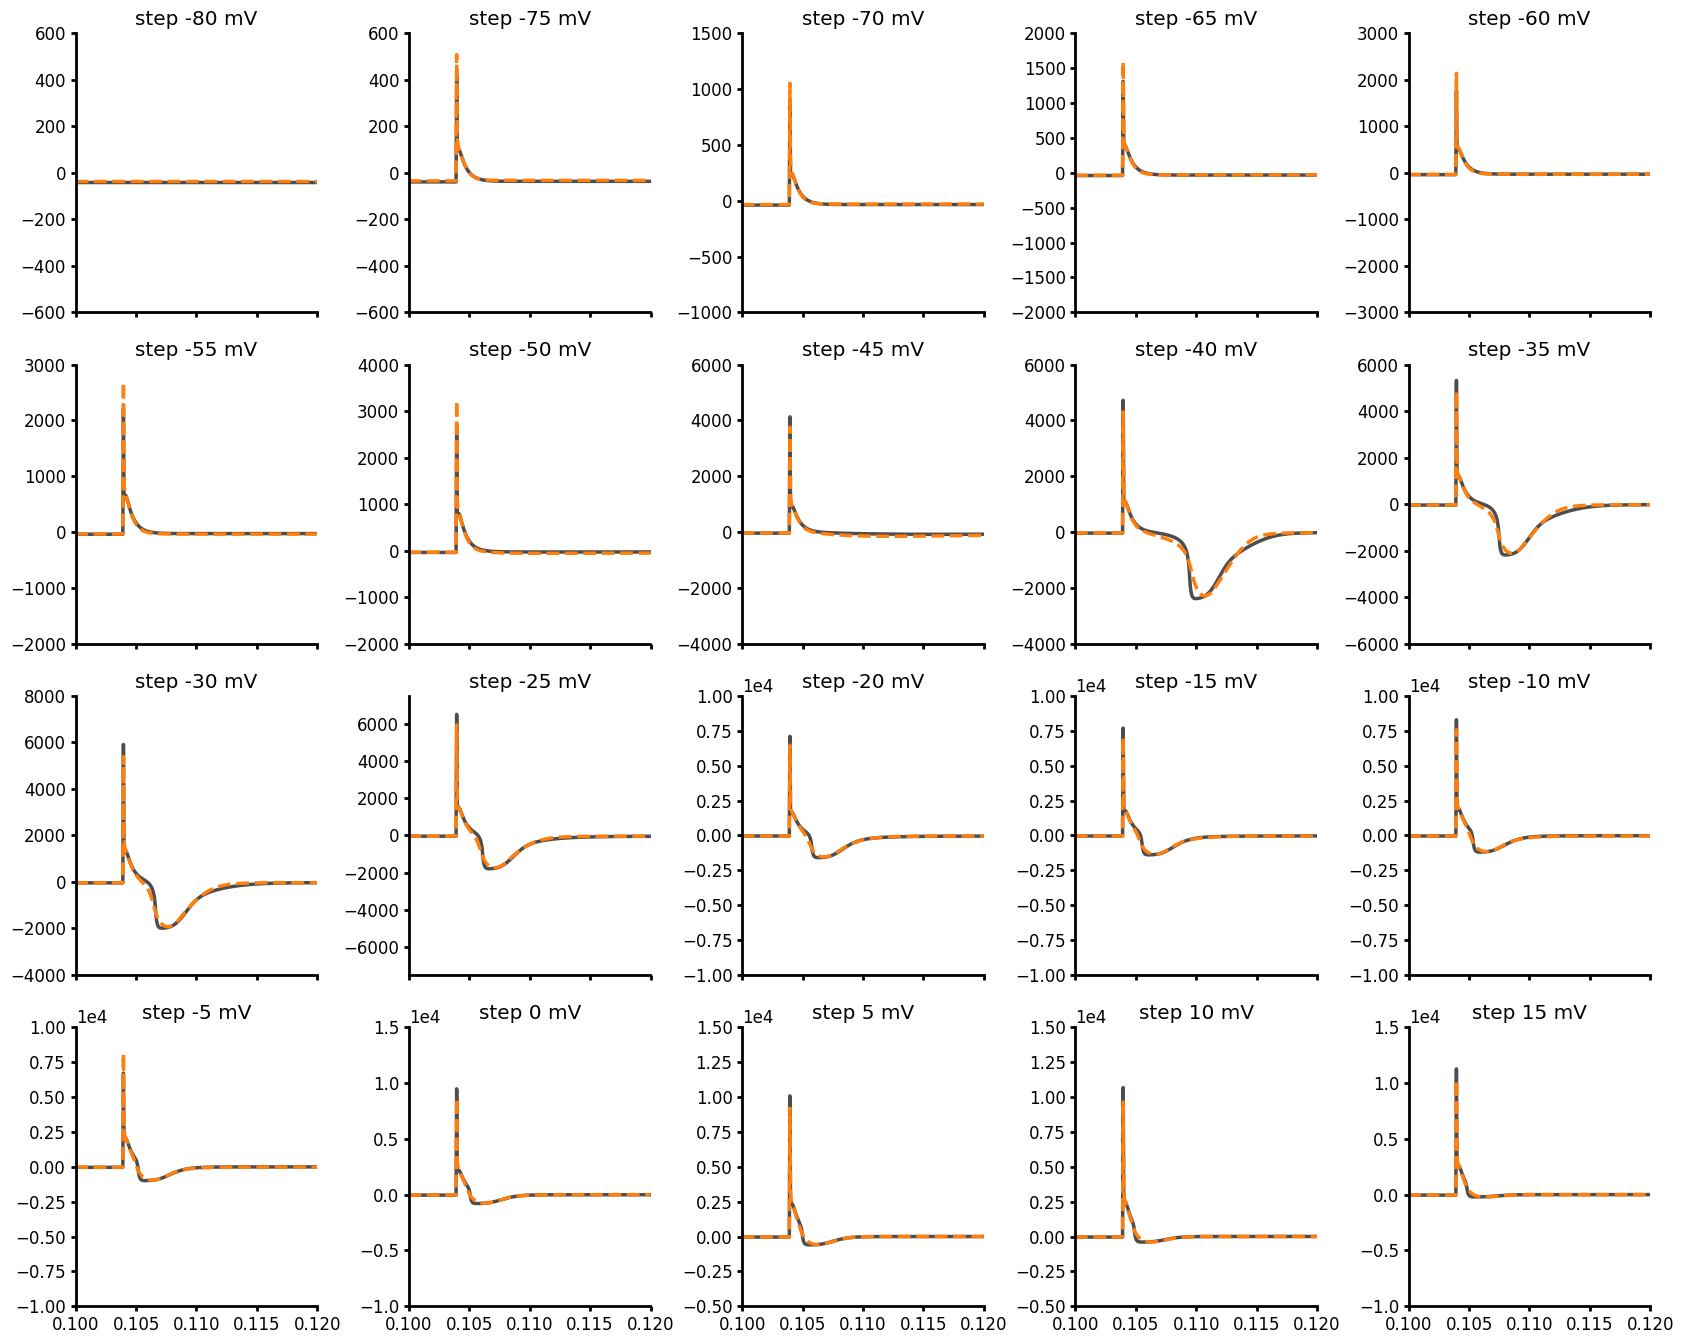

In [91]:

nrows, ncols = 4, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)
k = 0
for phenotype in phen:
    I_out = phenotype['trace'].I_out # A.I_out
    real_data_all = data.I_out
    n_sections = 20
    split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)

    
    
    dt = 5e-5

    colors = ['0.3', 'C1', 'C2','C3']

    i_global = 0
    k +=1
    for i_row in range(nrows):
        for i_col in range(ncols):
            ax = axes[i_row, i_col]
            plt.sca(ax)

            i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
            slice_current = slice(i_start, i_end)

            I_out_current = I_out[slice_current]
            data_current  = real_data_all[slice_current]
            t = np.arange(len(data_current)) * dt

            plt.plot(t, data_current,  color=colors[0])
            plt.plot(t, I_out_current, '--', color=colors[k])
            
            plt.grid()

            step_value = -80 + 5 * i_global
            title = f'step {step_value} mV'
            plt.title(title)

            i_global += 1
            plt.xlim(0.1,0.12)
            #plt.ylim(-2500,800)
            
    plt.tight_layout()

In [112]:
# names of genes
test = '210804_160554'
result = collect_results(test, '../../results/ina_pipette_linked_m_tau/', dump_keys=['best', 'dump'])
config = result['config'].copy()
m_index = config['runtime']['m_index']

dump_genes = result['dump']['dump']['genes'].reshape((-1, len(m_index)))
n_organisms = config['runtime']['n_organisms']

n_generations = len(dump_genes) // n_organisms
# multiindex (generation, numb_of_organism) 
index = pd.MultiIndex.from_product([range(n_generations), range(n_organisms)],
                                   names=['epoch', 'org'])

dump_genes = pd.DataFrame(dump_genes, columns=m_index, index=index)

dump_loss = result['dump']['dump']['loss'].reshape((n_generations, config['runtime']['n_organisms']))
epochs = []
for k in range(n_generations):
    for l in range(n_organisms):
        epochs.append(k)

500


In [108]:
lab = ['c_p', 'c_m', 'a0_m', 'b0_m', 'delta_m', 's_m', 'a0_h', 'b0_h', 'delta_h', 's_h', 'a0_j', 'b0_j', 'delta_j', 's_j', 'tau_j_const', 'R', 'R_f', 'g_max', 'g_leak', 'tau_z', 'x_c_comp', 'x_r_comp', 'alpha']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


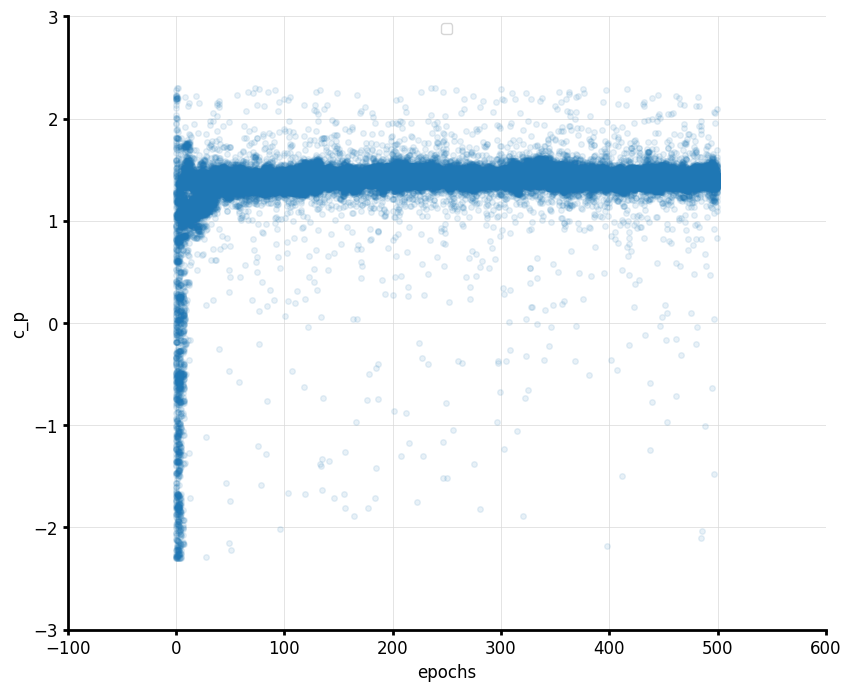

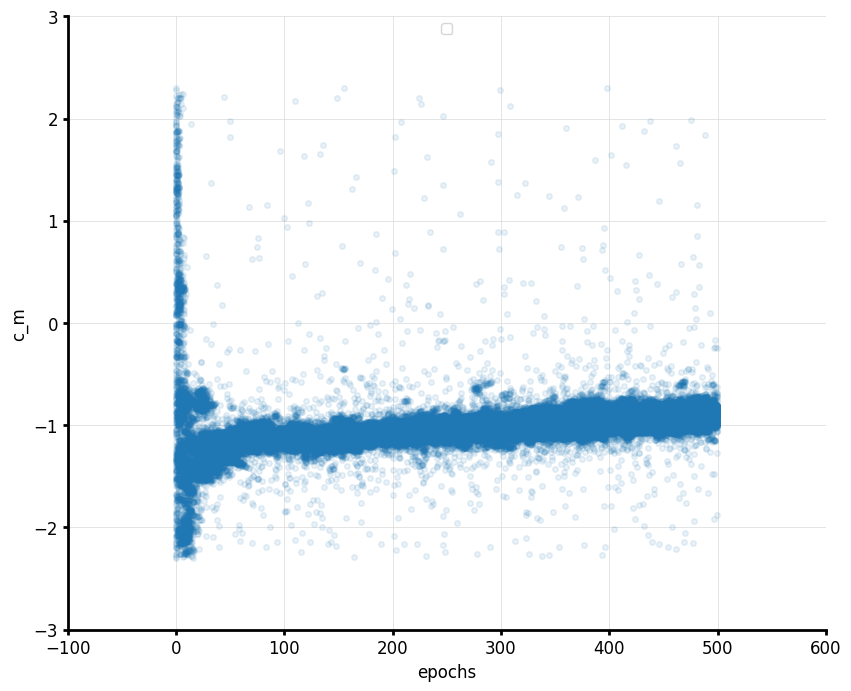

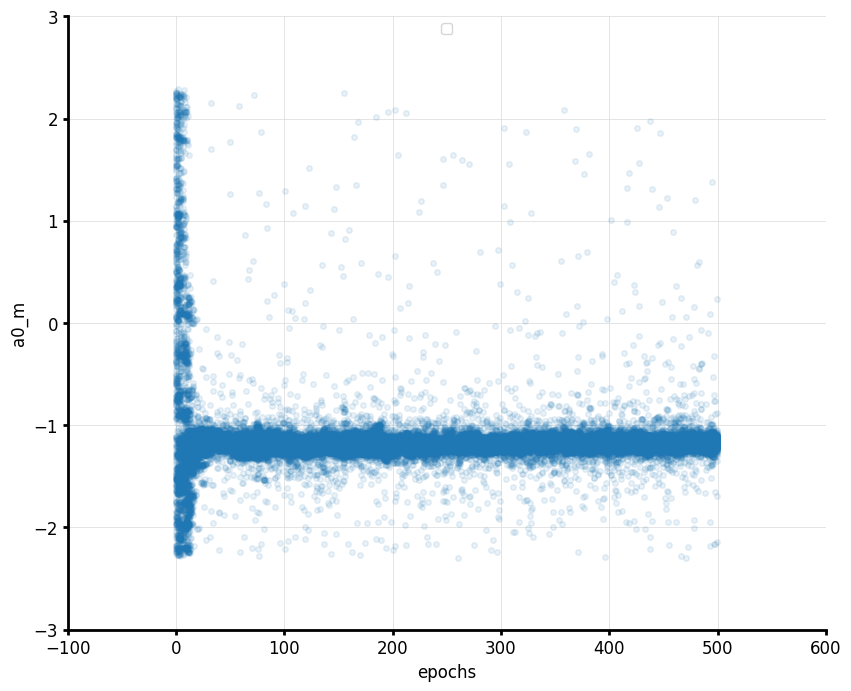

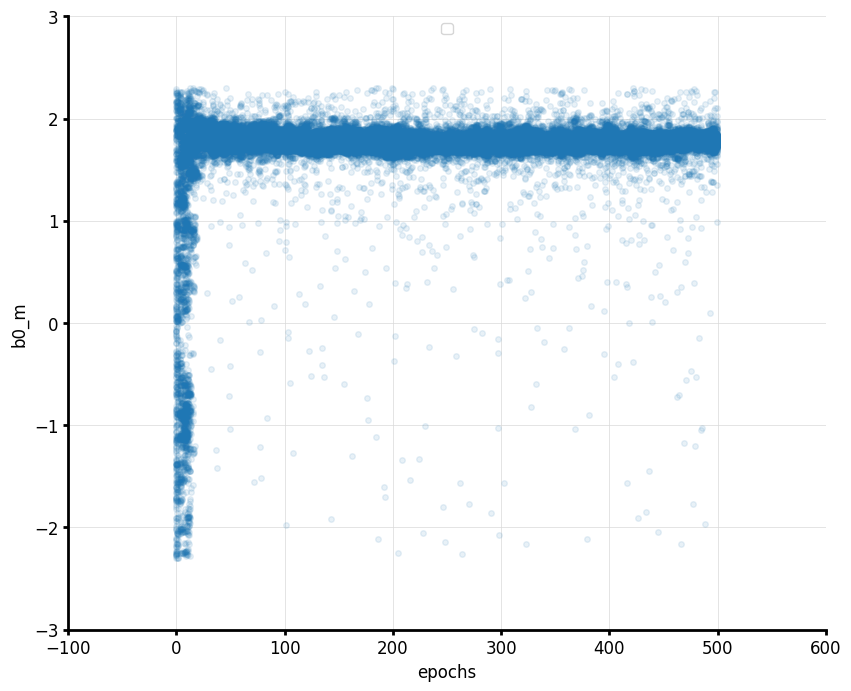

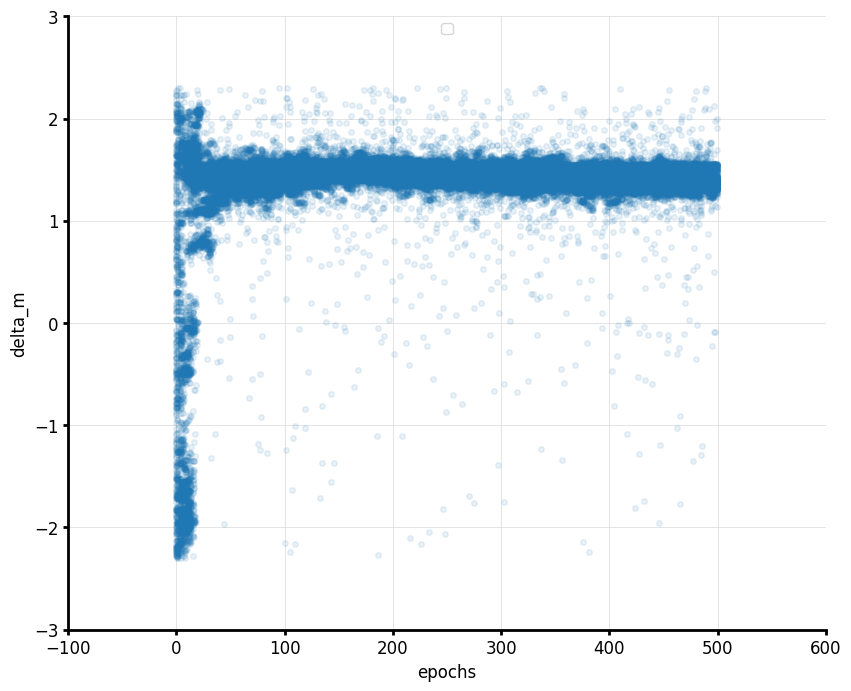

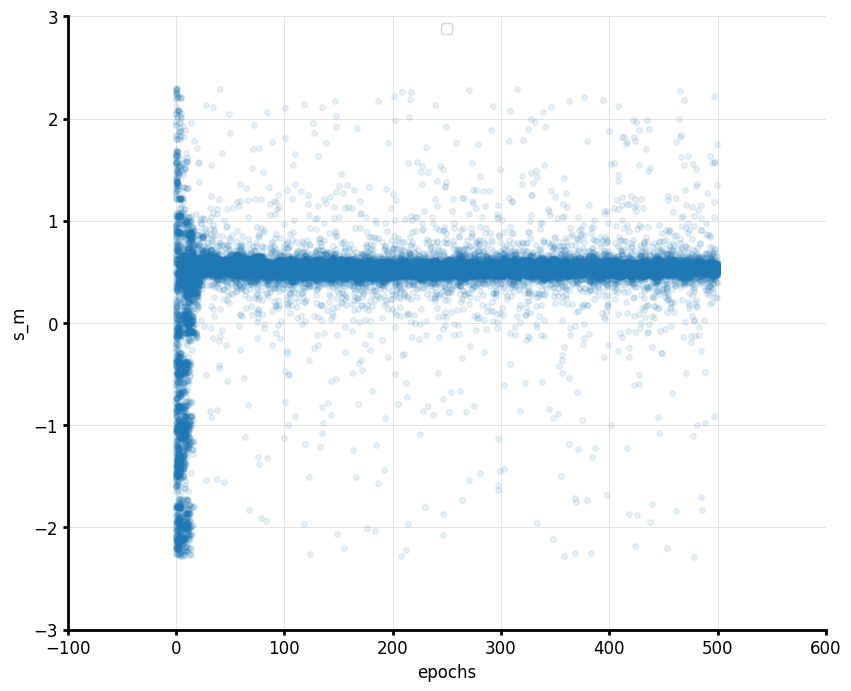

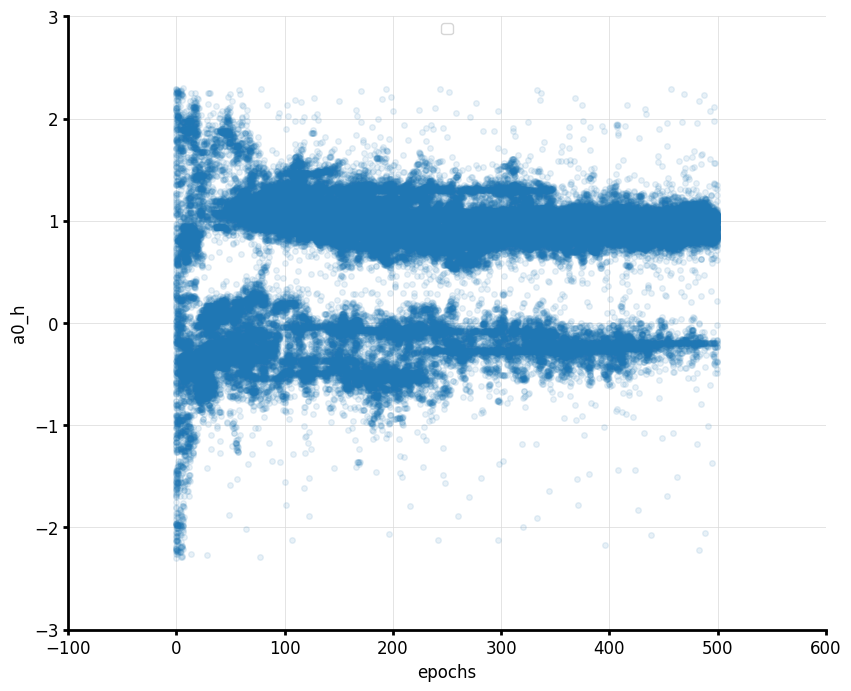

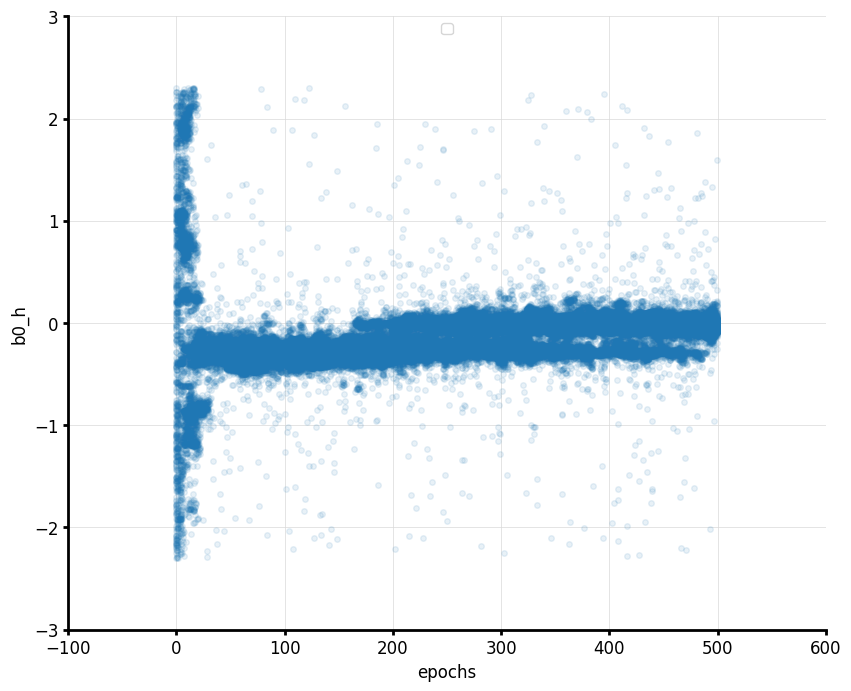

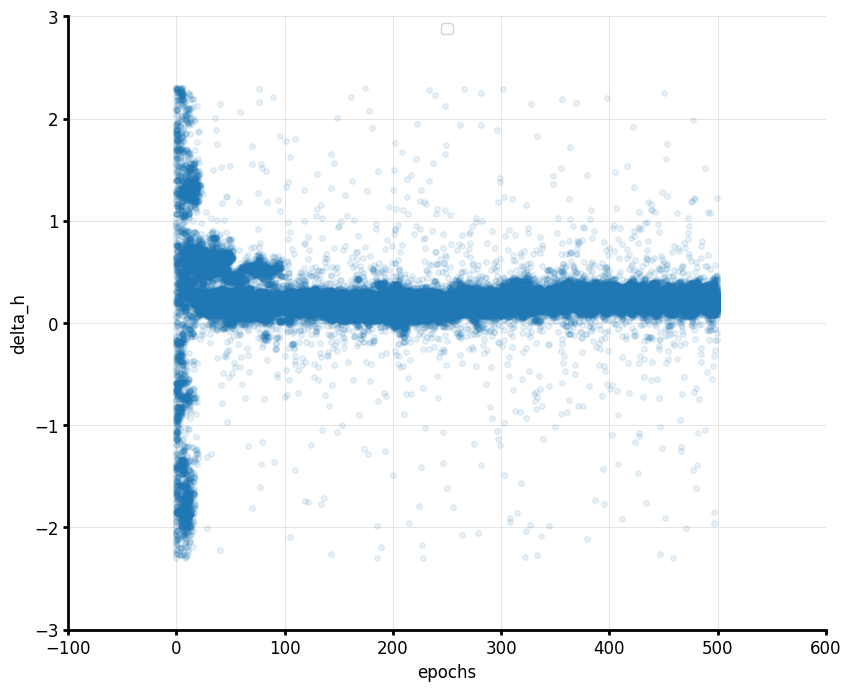

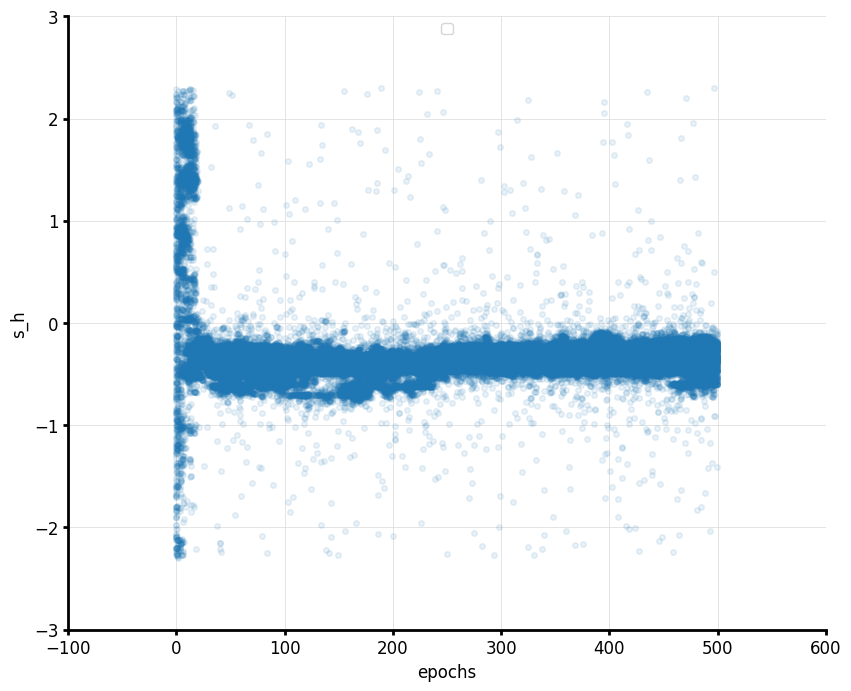

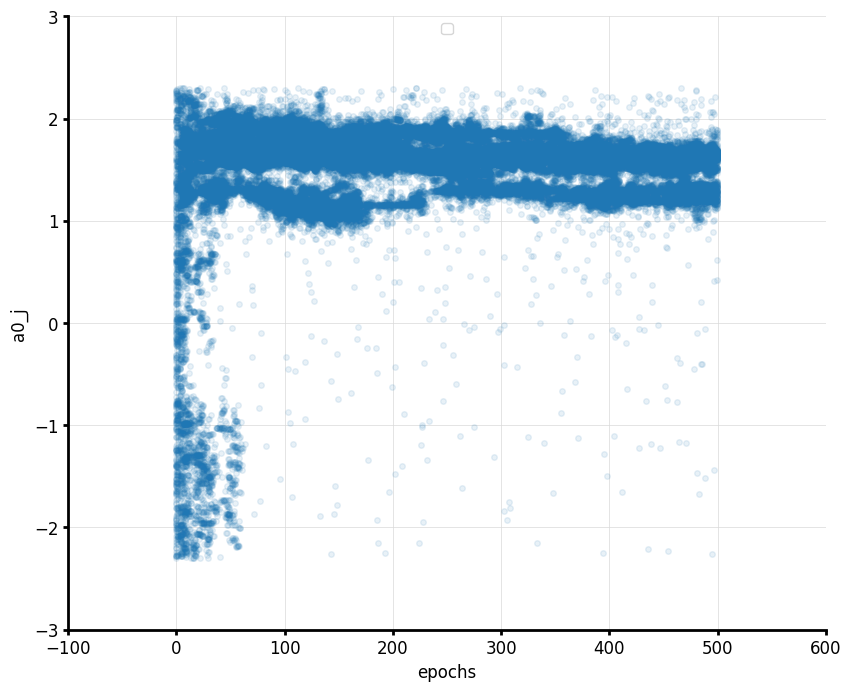

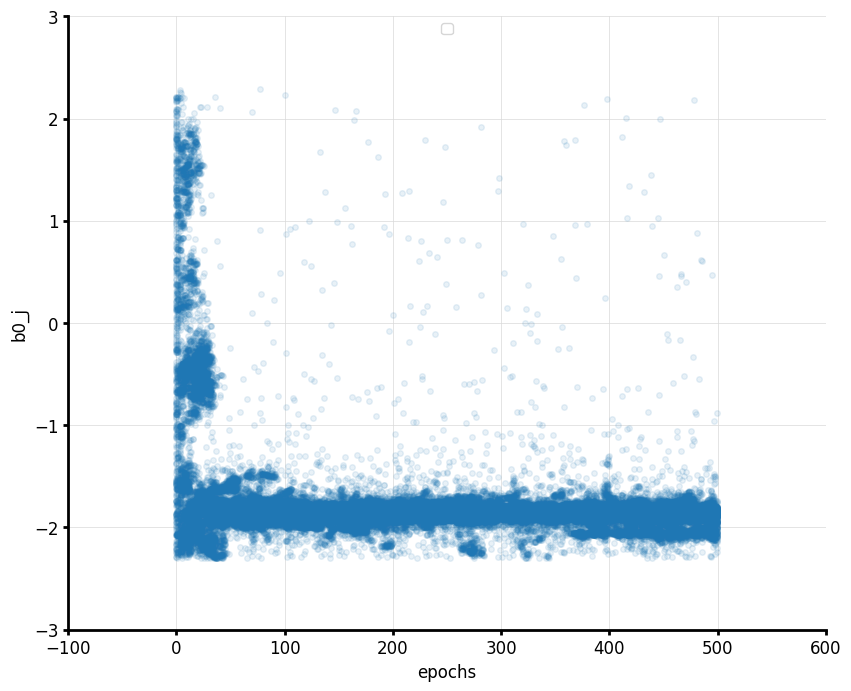

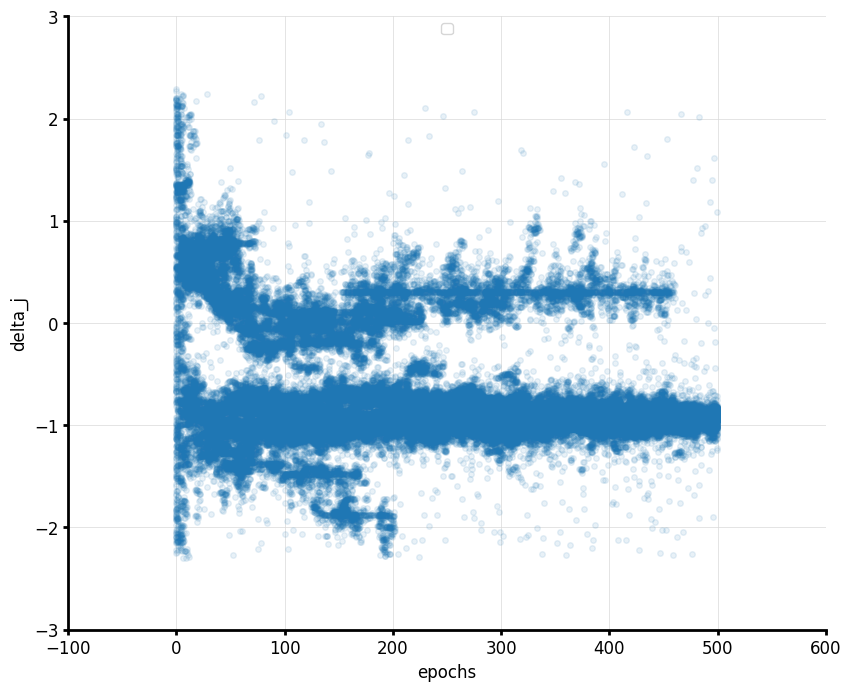

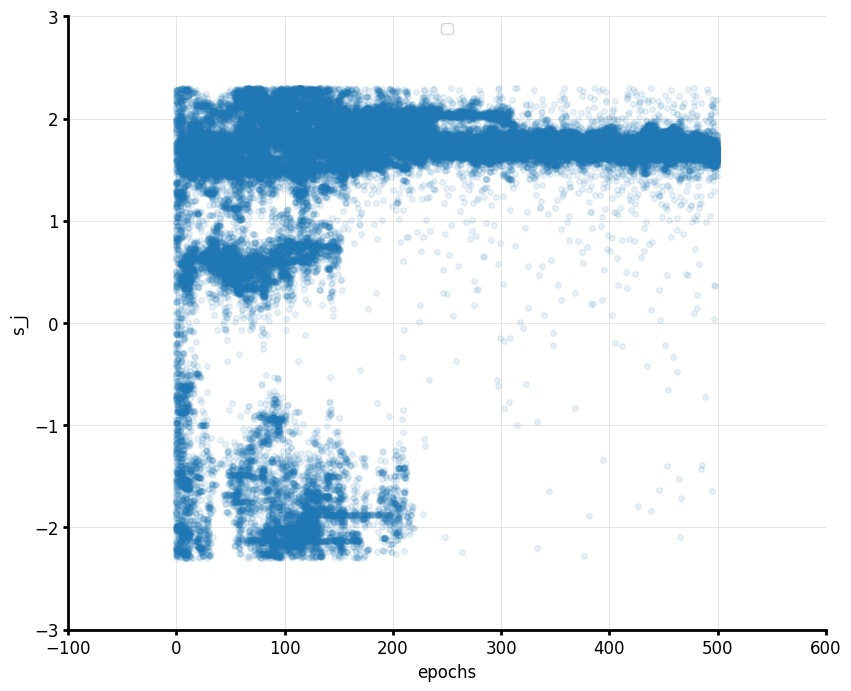

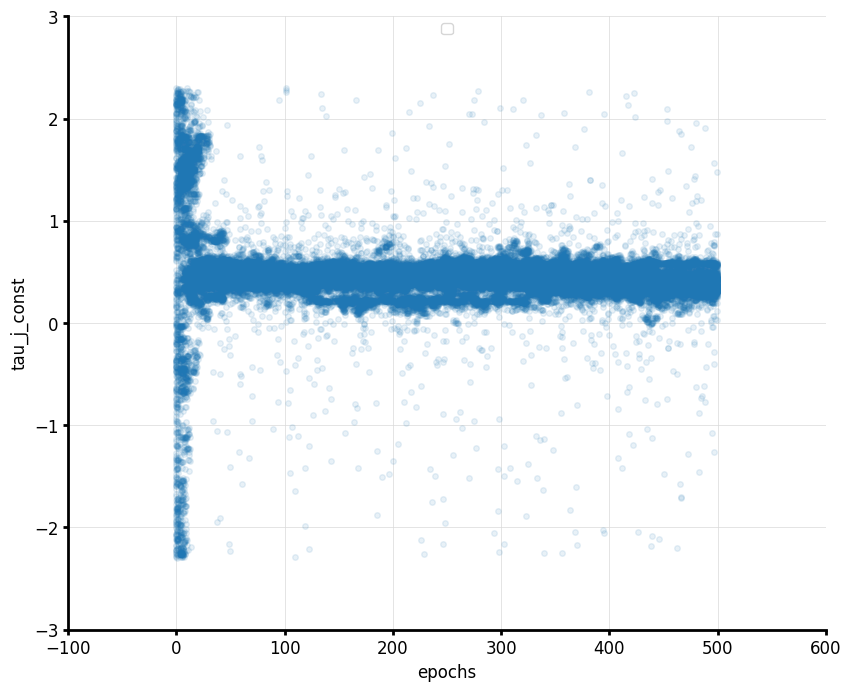

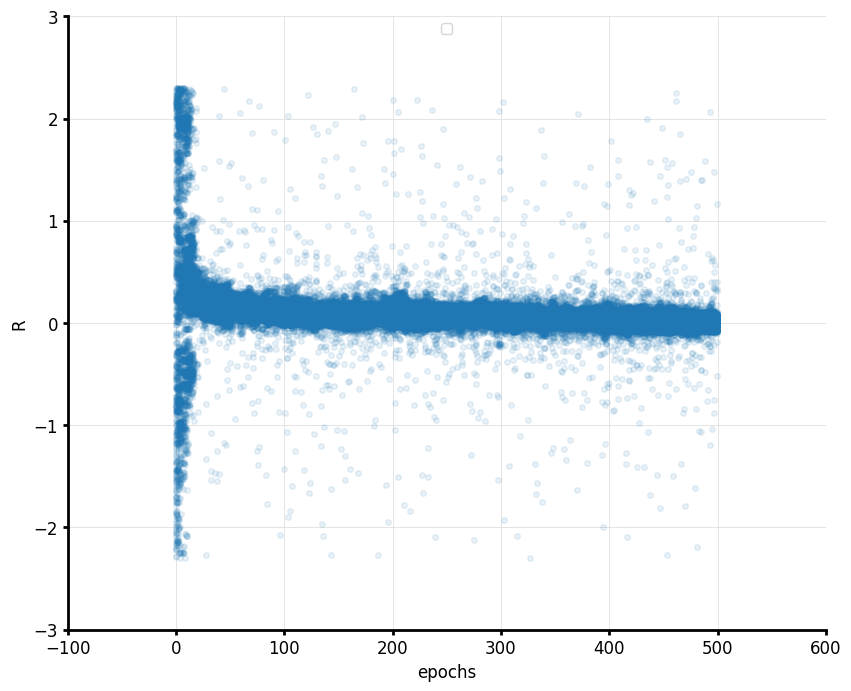

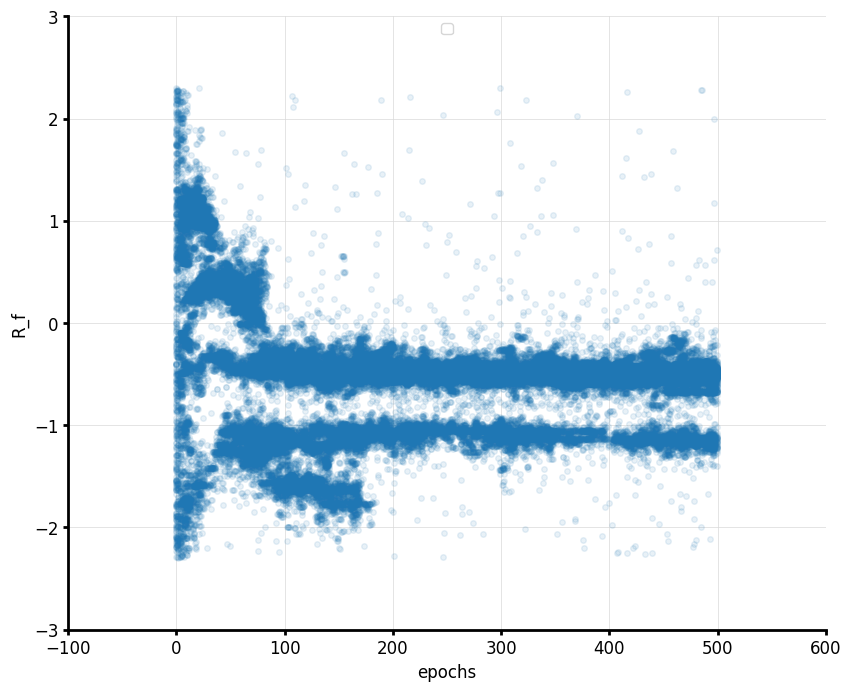

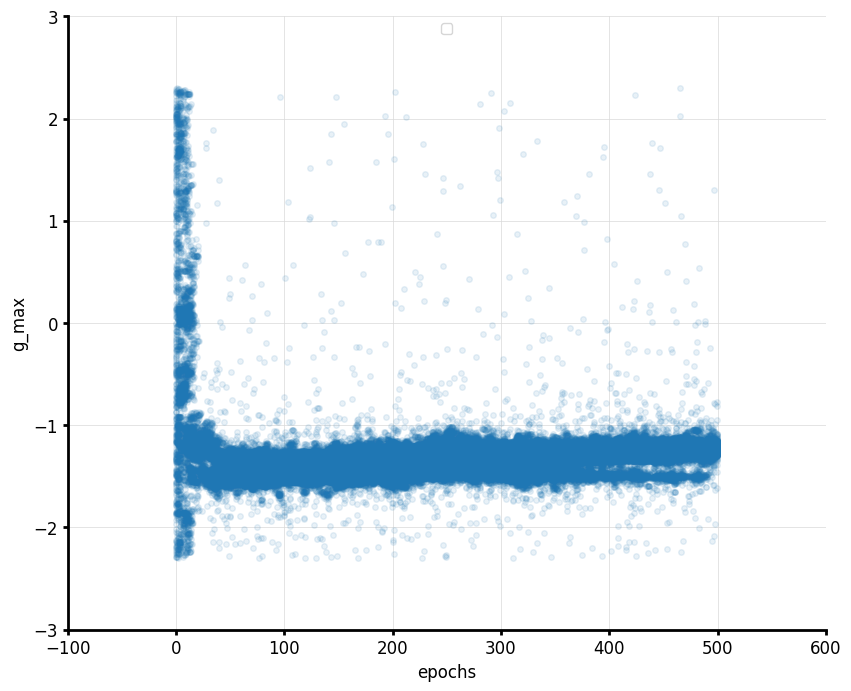

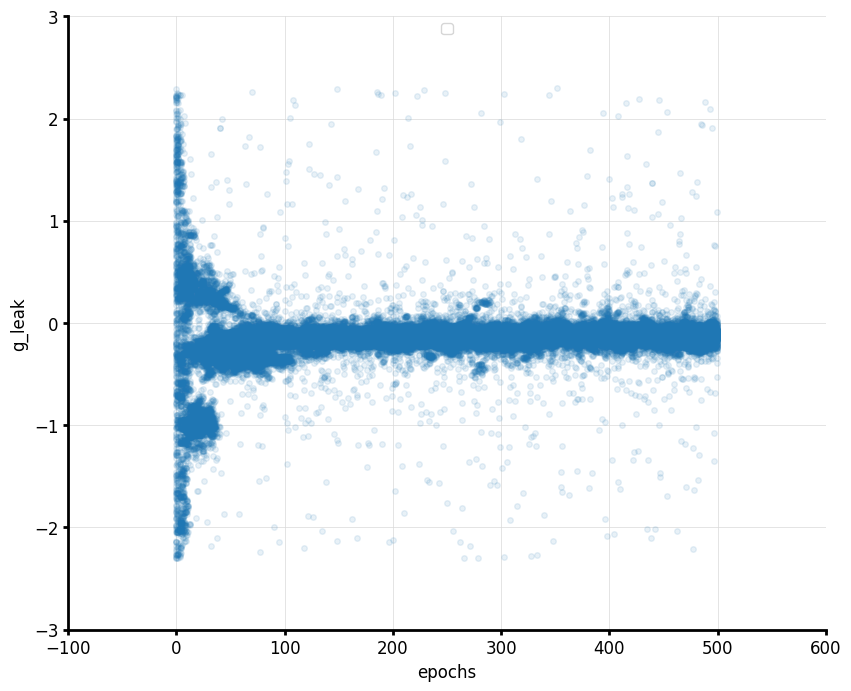

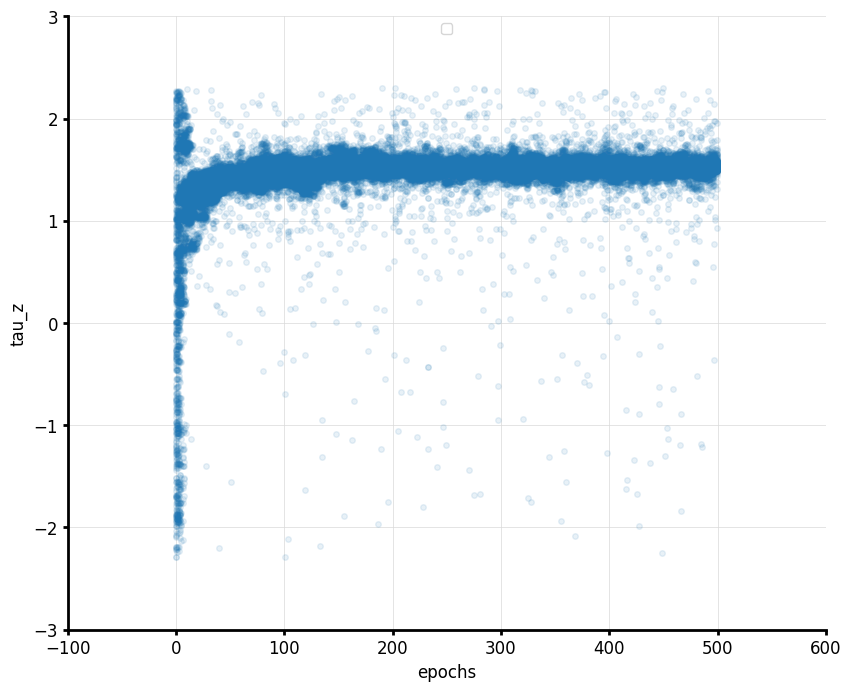

In [113]:
for k in range(20):
    plt.figure()
    plt.plot(epochs,np.log(result['dump']['dump']['genes'][k::24]) ,  '.', alpha=0.1)
    plt.ylabel(lab[k])
    plt.xlabel('epochs')
    #plt.xlim(0,2)
    #plt.ylim(1900, 2000)
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


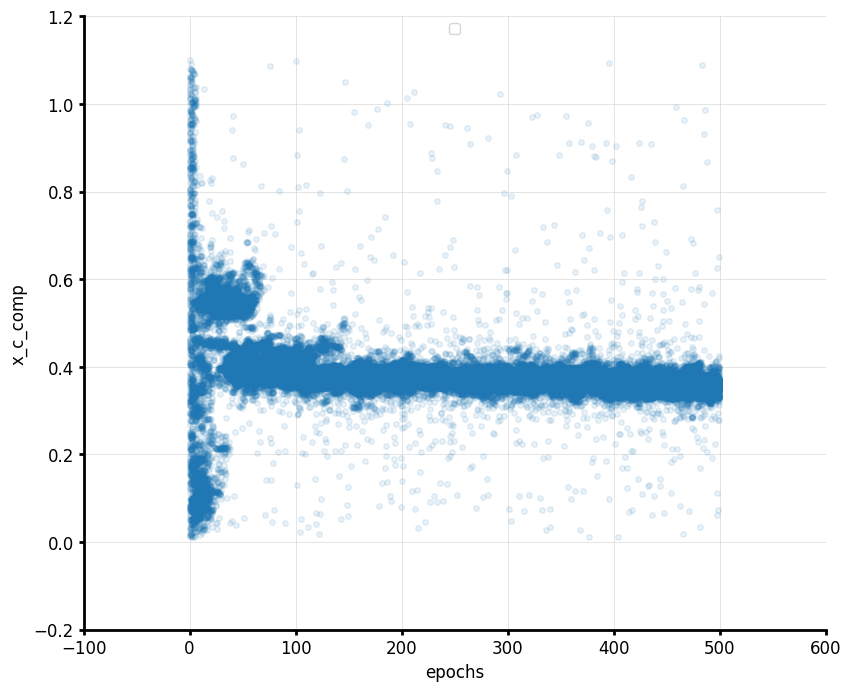

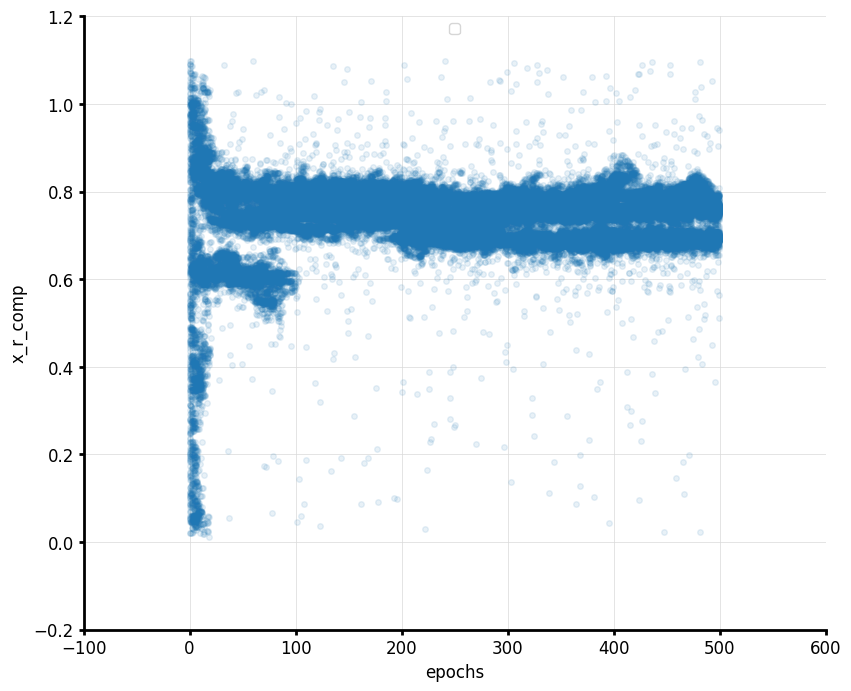

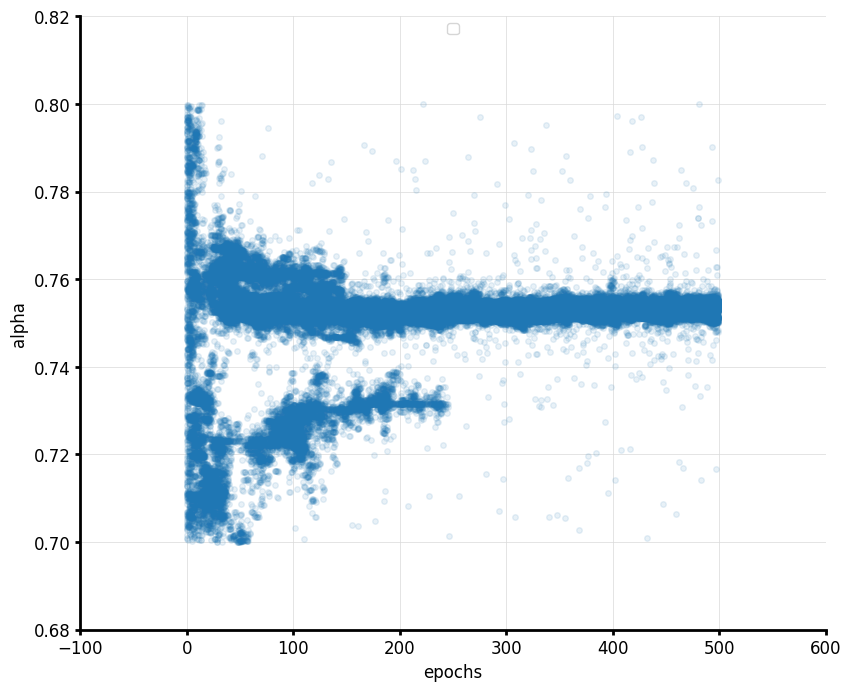

In [114]:
for k in range(20,23):
    plt.figure()
    plt.plot(epochs,result['dump']['dump']['genes'][k::24] ,  '.', alpha=0.1)

    plt.ylabel(lab[k])
    plt.xlabel('epochs')
    #plt.xlim(0,2)
    #plt.ylim(1900, 2000)
    plt.legend()